# April 10- Prepare Gajer data for ML

In [4]:
df['CST_HL'].value_counts(dropna=False)

CST_HL
3.0    367
4.0    312
1.0    157
2.0     53
Name: count, dtype: int64

In [9]:
from QE_functions import *
df = Gajer_preprocessing_data(log=False, rel_abund=True, zscore=True)
X, y = menstruation_xblock_y_premensesX(df, menses_included=False,four_labels=False) #X=premenses data
print(np.unique(y, return_counts=True))
X, y = drop_blocks(X,y,thres=4)
#for block in X:
 #   block.drop(columns=['CST_HL'],inplace=True)

relative abundance + zscore data
Number of x_blocks (X): 116
Shape of labels (y): (116,)
(array([0, 1]), array([70, 46]))
Filtered number of x_blocks: 76
Filtered shape of labels (y): (76,)
Number of 1s: 30
Number of 0s: 46


Cross-validation scores: [0.9375     0.8        0.8        0.73333333 0.86666667]
Mean cross-validation accuracy: 0.83


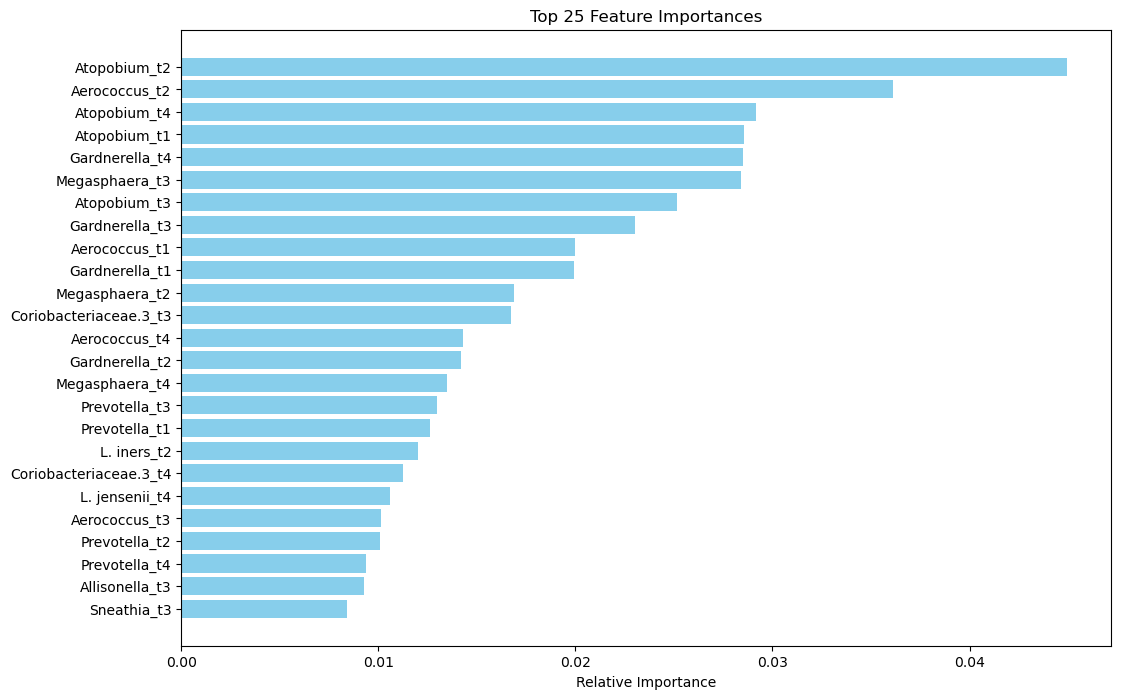

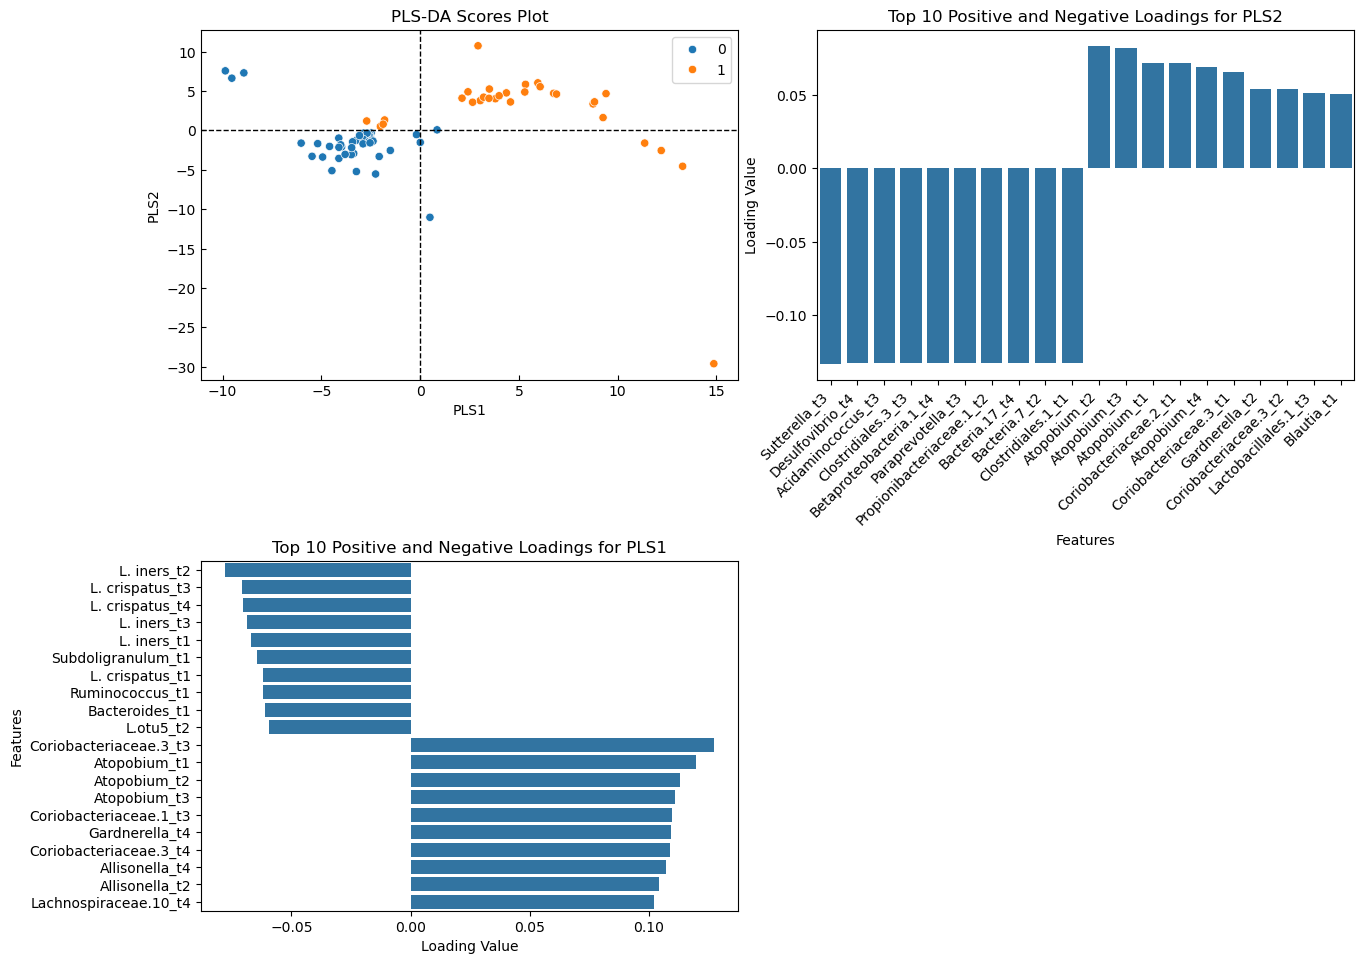

accuracy  precision  recall    f1  specificity   mse  \
Random Forest            0.87       0.86    0.80  0.83         0.91  0.13   
Logistic Regression      0.85       0.81    0.83  0.82         0.87  0.15   
Linear SVM               0.80       0.73    0.80  0.76         0.80  0.20   
RBF SVM                  0.80       0.93    0.53  0.67         0.98  0.20   
K-Nearest Neighbors      0.75       1.00    0.37  0.50         1.00  0.25   
Gradient Boosting        0.83       0.83    0.77  0.77         0.87  0.17   
PLS-DA                   0.84       0.83    0.73  0.78         0.91  0.16   
Random Guess             0.61       0.00    0.00  0.00         1.00  0.39   

                      auc  
Random Forest        0.92  
Logistic Regression  0.86  
Linear SVM           0.82  
RBF SVM              0.87  
K-Nearest Neighbors  0.82  
Gradient Boosting    0.87  
PLS-DA               0.86  
Random Guess         0.70

In [18]:
df = flatten(X)
random_forest_model(df,y)
RForest_top_features_plot(df,y,numb_features=25)
scores, loadings = plsda_scores_loading(df,y,numb_loadings=10, orthogonalize=False)
all_model_evaluation(df,y,test=True,n_splits=3)

In [55]:
lstm_model(X,y,padding_value = -1000,n_folds=5)

Training fold 1...
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 292ms/step - accuracy: 0.5319 - loss: 1.2309 - val_accuracy: 0.6250 - val_loss: 0.6684
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.5326 - loss: 0.8643 - val_accuracy: 0.6250 - val_loss: 0.6656
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.5222 - loss: 1.3885 - val_accuracy: 0.5625 - val_loss: 0.6813
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.4229 - loss: 1.4393 - val_accuracy: 0.6250 - val_loss: 0.6671
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.5653 - loss: 1.0049 - val_accuracy: 0.6250 - val_loss: 0.6748
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.5319 - loss: 1.1862 - val_accuracy: 0.6250 - val_loss: 0.6691
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.5431 - loss: 0.9194 - val_accuracy: 0.6250 - val_loss: 0.6671
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.5542 - loss: 0.9302 - val_accuracy: 0.

In [10]:
(X_1, y_1), (X_2, y_2), (X_3, y_3), (X_4, y_4), (X_5, y_5) = split_blocks_by_CST_most_frequent(X, y, equal_selection=False)


length of X_1 and y_1:  15 15
length of X_2 and y_2:  2 2
length of X_3 and y_3:  30 30
length of X_4 and y_4:  28 28
length of X_5 and y_5:  0 0


In [11]:
lst_y = [y_1,y_2,y_3,y_4,y_5]
for i in range(len(lst_y)):
    print('number of samples in CST{}: {}'.format(i+1,len(lst_y[i])))
    print('number of cases get BV post menses ',sum(lst_y[i]==1))

number of samples in CST1: 15
number of cases get BV post menses  0
number of samples in CST2: 2
number of cases get BV post menses  0
number of samples in CST3: 30
number of cases get BV post menses  6
number of samples in CST4: 28
number of cases get BV post menses  24
number of samples in CST5: 0
number of cases get BV post menses  0


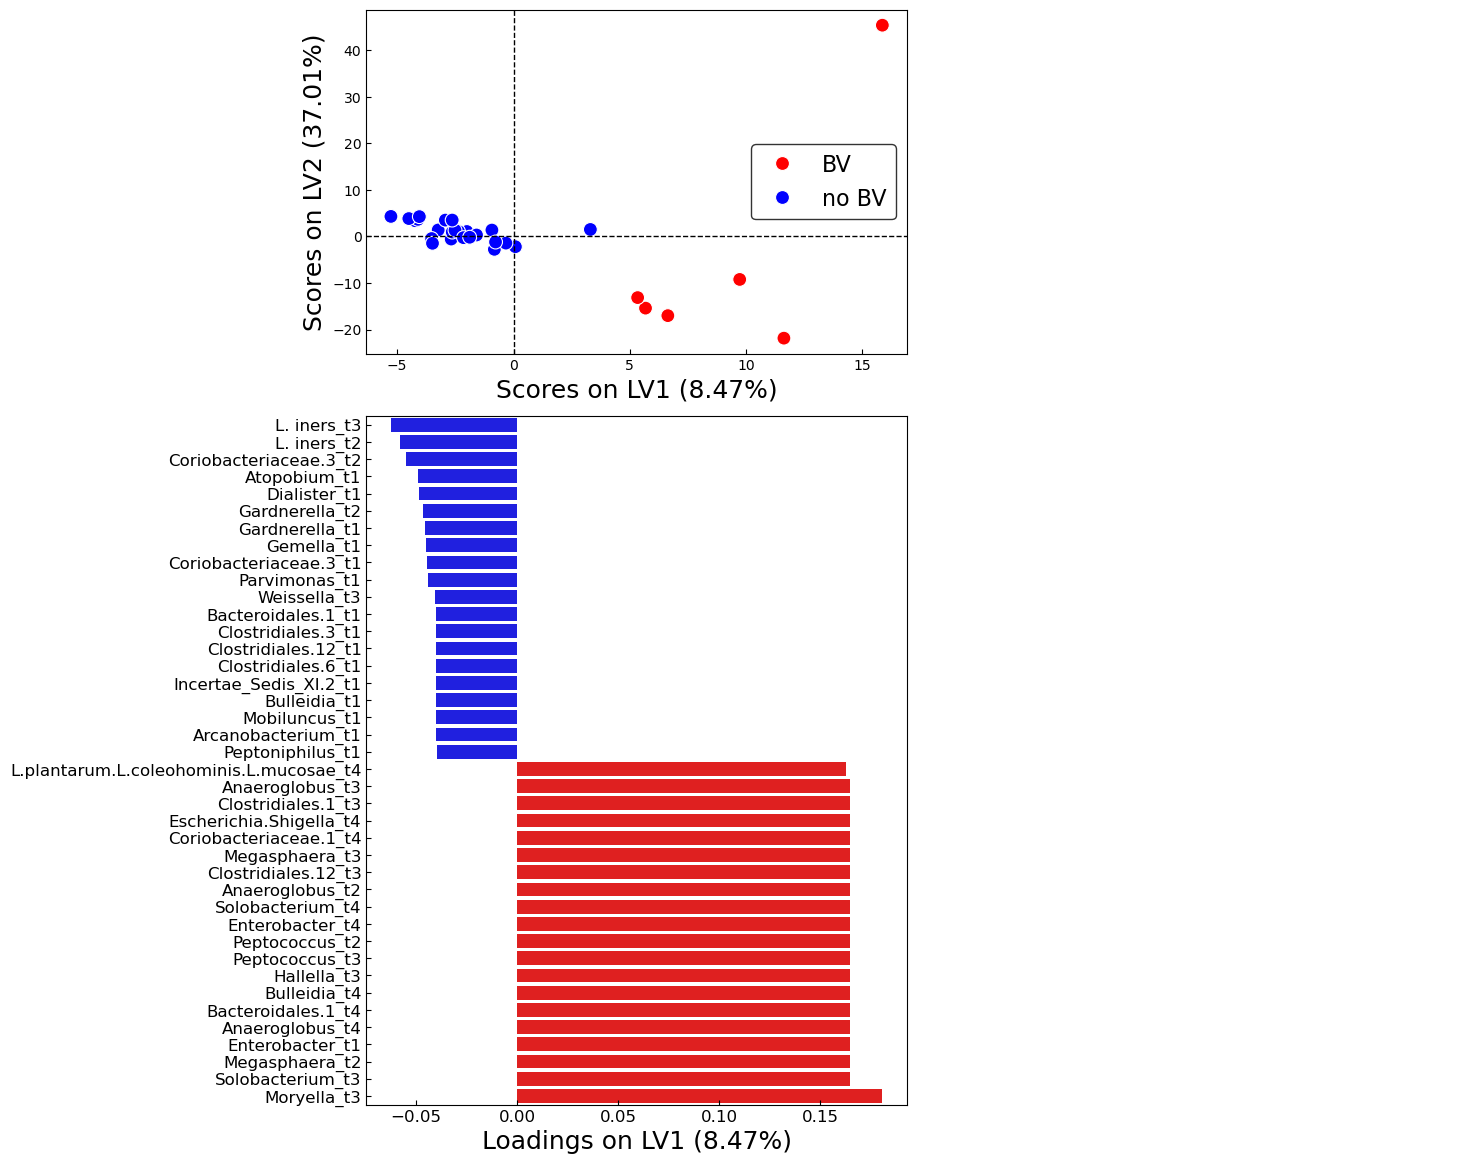

In [12]:
df_3 = flatten(X_3)
PLSDA_plots(df_3, y_3, num_components=2, orthogonalize=True, num_loadings=20, LV1=True, LV2=False)

Cross-validation scores: [0.66666667 0.83333333 0.83333333 0.83333333 0.83333333]
Mean cross-validation accuracy: 0.80


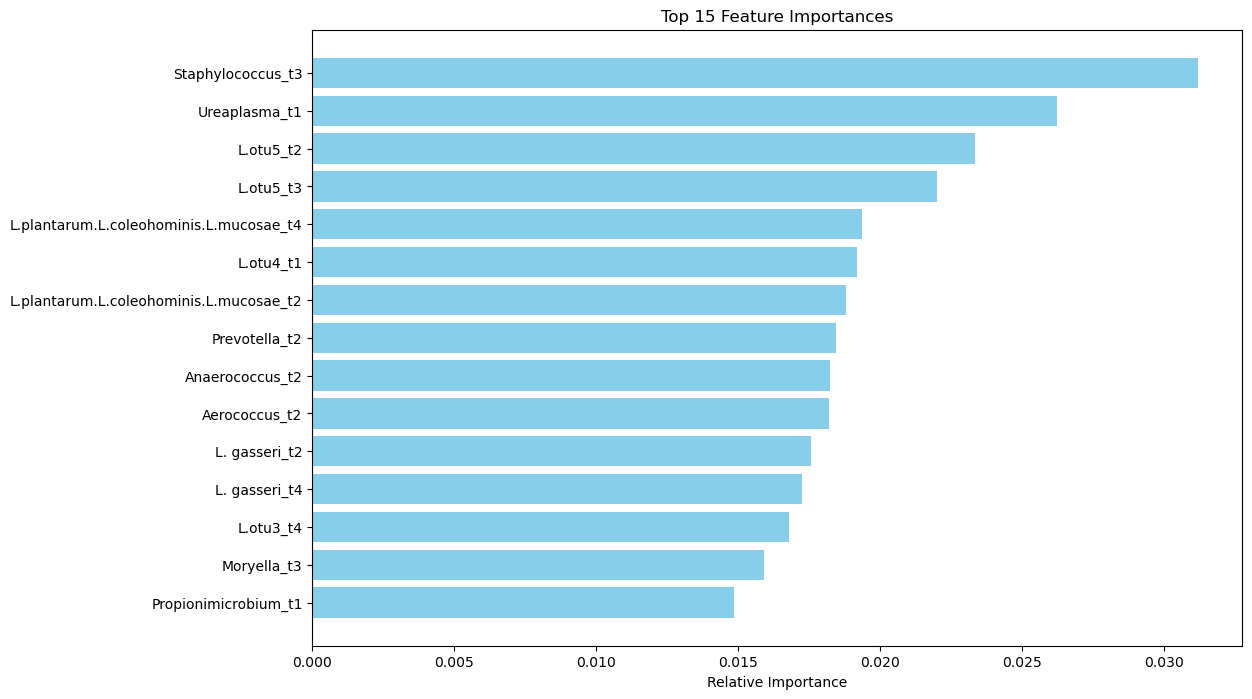

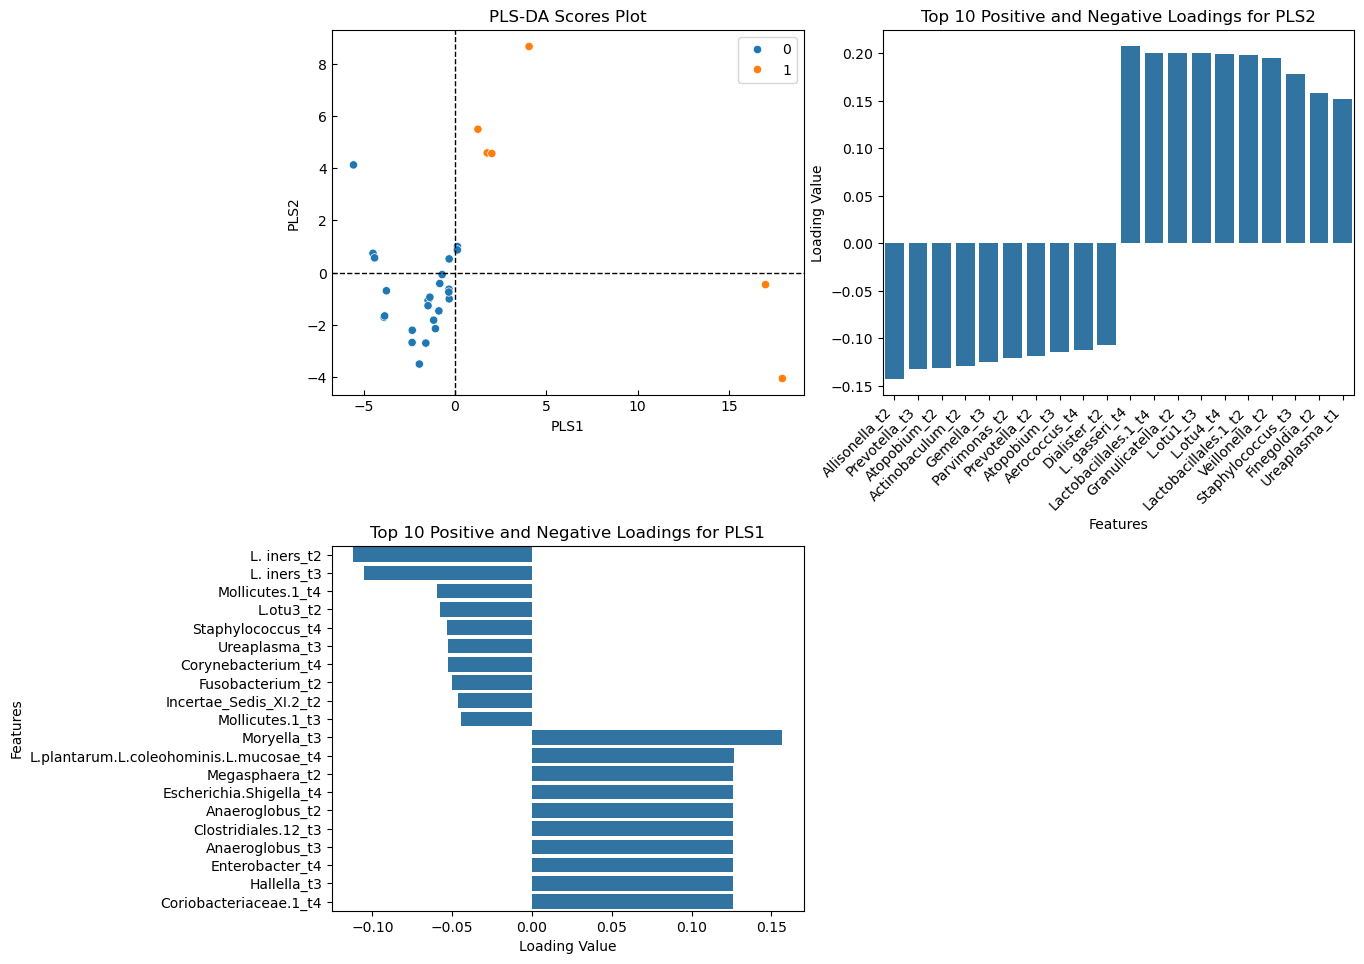

accuracy  precision  recall    f1  specificity   mse  \
Random Forest            0.80       0.00    0.00  0.00         1.00  0.20   
Logistic Regression      0.87       0.67    0.33  0.44         1.00  0.13   
Linear SVM               0.87       0.67    0.33  0.44         1.00  0.13   
RBF SVM                  0.53       0.11    0.33  0.17         0.58  0.47   
K-Nearest Neighbors      0.80       0.00    0.00  0.00         1.00  0.20   
Gradient Boosting        0.83       0.33    0.17  0.22         1.00  0.17   
PLS-DA                   0.70       0.19    0.33  0.24         0.79  0.30   
Random Guess             0.80       0.00    0.00  0.00         1.00  0.20   

                      auc  
Random Forest        0.31  
Logistic Regression  0.46  
Linear SVM           0.30  
RBF SVM              0.37  
K-Nearest Neighbors  0.65  
Gradient Boosting    0.37  
PLS-DA               0.32  
Random Guess         0.60

In [23]:
df_3 = flatten(X_3)
random_forest_model(df_3,y_3)
RForest_top_features_plot(df_3,y_3,numb_features=15)
scores, loadings = plsda_scores_loading(df_3,y_3,numb_loadings=10, orthogonalize=False)
all_model_evaluation(df_3,y_3,test=True,n_splits=3)

In [25]:
#save for elastic net
matlab_ddm_save_data(df_3,y_3)

In [26]:
#Run with selected features using elastic net
import pandas as pd 
df_3 = pd.read_csv('Gajer_Elastic_Net/CST3_Premenses_Nugent/X_CST3_top_features.csv')
df_3 = df_3.iloc[:,1:]
all_model_evaluation(df_3,y_3,test=True,n_splits=3)

accuracy  precision  recall    f1  specificity   mse  \
Random Forest            0.80       0.00    0.00  0.00         1.00  0.20   
Logistic Regression      0.87       0.67    0.33  0.44         1.00  0.13   
Linear SVM               0.87       0.67    0.33  0.44         1.00  0.13   
RBF SVM                  0.57       0.00    0.00  0.00         0.71  0.43   
K-Nearest Neighbors      0.80       0.00    0.00  0.00         1.00  0.20   
Gradient Boosting        0.80       0.33    0.17  0.22         0.96  0.20   
PLS-DA                   0.90       1.00    0.50  0.67         1.00  0.10   
Random Guess             0.80       0.00    0.00  0.00         1.00  0.20   

                      auc  
Random Forest        0.49  
Logistic Regression  0.54  
Linear SVM           0.30  
RBF SVM              0.35  
K-Nearest Neighbors  0.74  
Gradient Boosting    0.57  
PLS-DA               0.83  
Random Guess         0.60

Cross-validation scores: [0.83333333 0.83333333 0.83333333 1.         0.8       ]
Mean cross-validation accuracy: 0.86


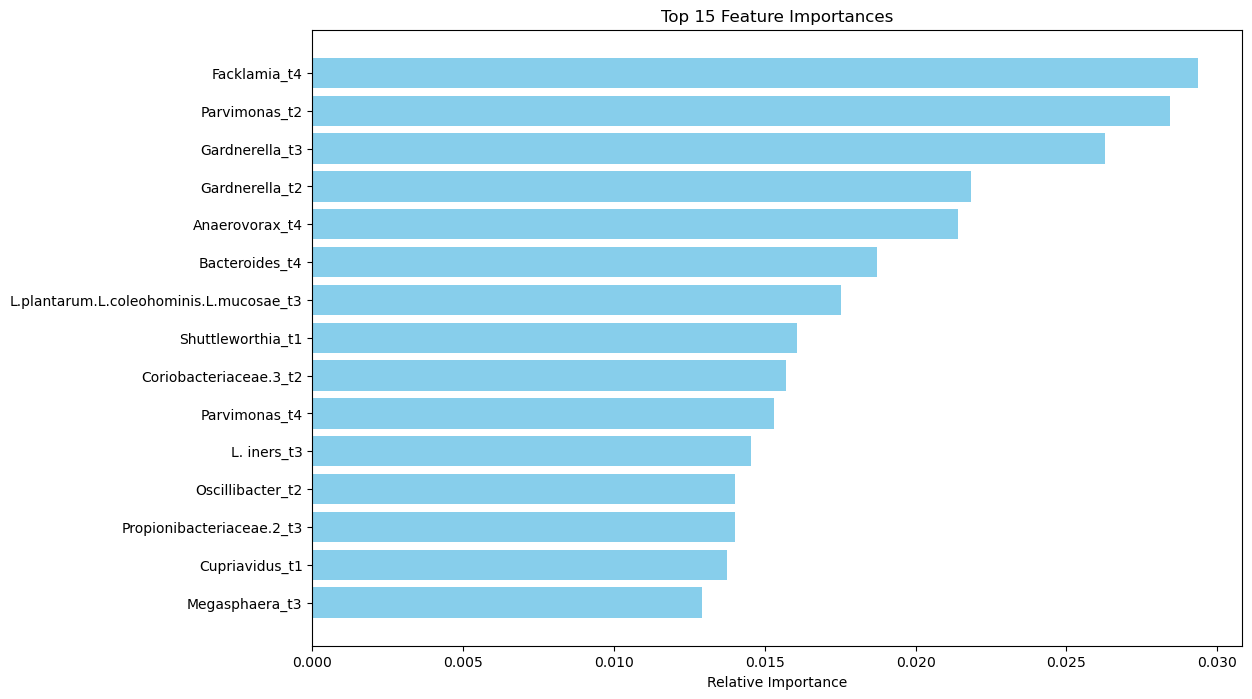

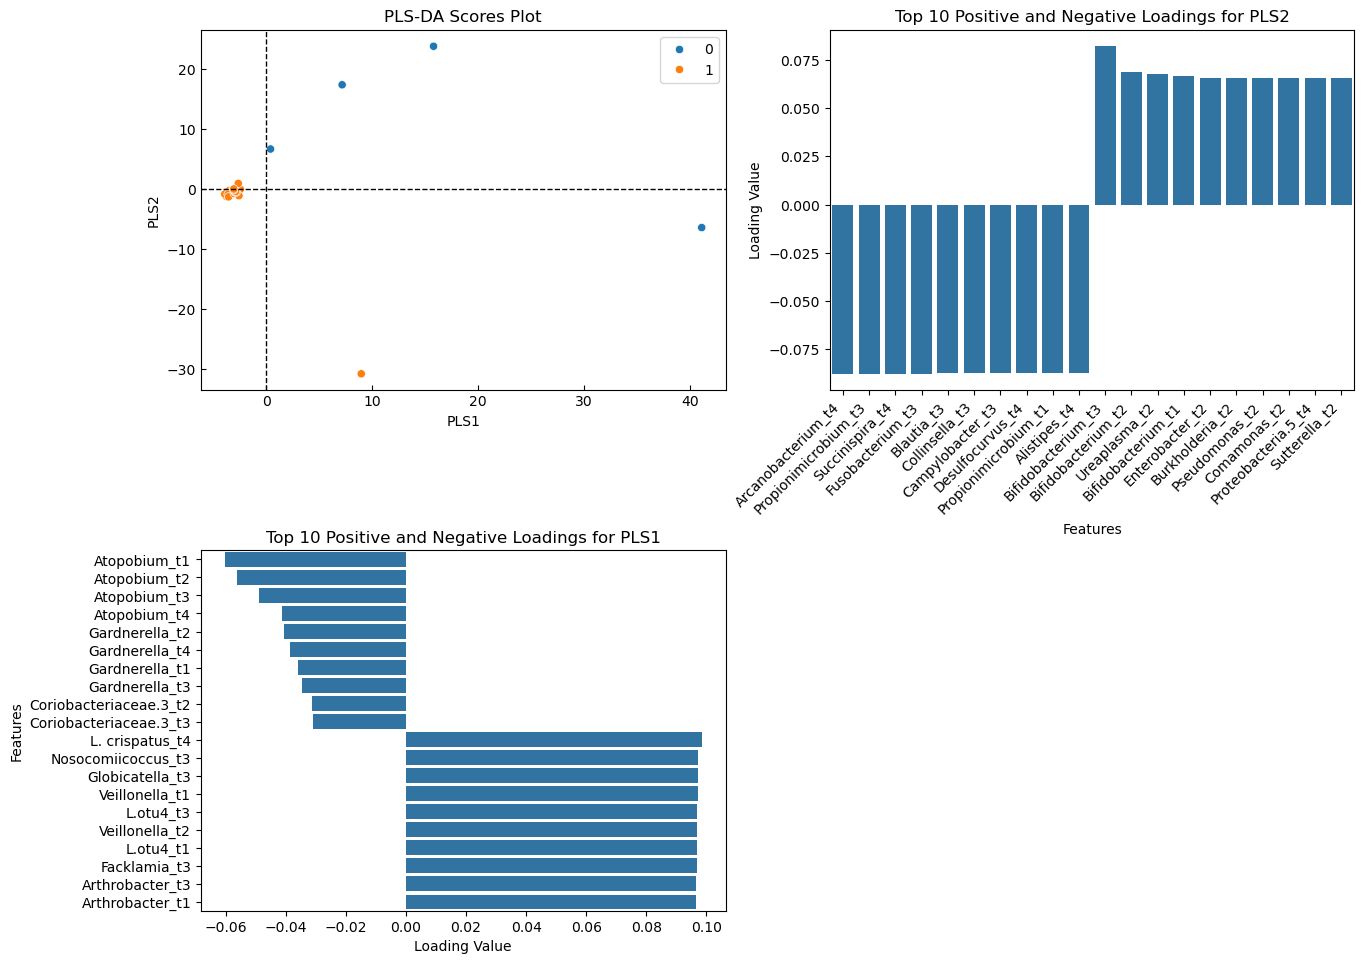

accuracy  precision  recall    f1  specificity   mse  \
Random Forest            0.86       0.86    1.00  0.92         0.00  0.14   
Logistic Regression      0.86       0.86    1.00  0.92         0.00  0.14   
Linear SVM               0.83       0.85    0.96  0.90         0.00  0.17   
RBF SVM                  0.86       0.86    1.00  0.92         0.00  0.14   
K-Nearest Neighbors      0.86       0.86    1.00  0.92         0.00  0.14   
Gradient Boosting        0.79       0.85    0.92  0.88         0.00  0.21   
PLS-DA                   0.86       0.89    0.96  0.92         0.33  0.14   
Random Guess             0.86       0.86    1.00  0.92         0.00  0.14   

                      auc  
Random Forest        0.91  
Logistic Regression  0.93  
Linear SVM           0.84  
RBF SVM              0.83  
K-Nearest Neighbors  0.91  
Gradient Boosting    0.93  
PLS-DA               0.83  
Random Guess         0.93

In [28]:
df_4 = flatten(X_4)
random_forest_model(df_4,y_4)
RForest_top_features_plot(df_4,y_4,numb_features=15)
scores, loadings = plsda_scores_loading(df_4,y_4,numb_loadings=10, orthogonalize=False)
all_model_evaluation(df_4,y_4,test=True,n_splits=3)

In [29]:
#save for elastic net
matlab_ddm_save_data(df_4,y_4)

In [30]:
#Run with selected features using elastic net
import pandas as pd 
df_4 = pd.read_csv('Gajer_Elastic_Net/CST4_Premenses_Nugent/X_CST4_top_features.csv')
df_4 = df_4.iloc[:,1:]
all_model_evaluation(df_4,y_4,test=True,n_splits=3)

accuracy  precision  recall    f1  specificity   mse  \
Random Forest            0.86       0.86    1.00  0.92          0.0  0.14   
Logistic Regression      0.83       0.85    0.96  0.90          0.0  0.17   
Linear SVM               0.83       0.85    0.96  0.90          0.0  0.17   
RBF SVM                  0.83       0.85    0.96  0.90          0.0  0.17   
K-Nearest Neighbors      0.86       0.86    1.00  0.92          0.0  0.14   
Gradient Boosting        0.83       0.85    0.96  0.90          0.0  0.17   
PLS-DA                   0.83       0.85    0.96  0.90          0.0  0.17   
Random Guess             0.86       0.86    1.00  0.92          0.0  0.14   

                      auc  
Random Forest        0.97  
Logistic Regression  0.91  
Linear SVM           0.82  
RBF SVM              0.82  
K-Nearest Neighbors  0.91  
Gradient Boosting    0.97  
PLS-DA               0.80  
Random Guess         0.93

# April 14: Gajer vs. HMP 

log transformed data
Number of x_blocks (X): 239
Shape of labels (y): (239,)
(array([0, 1]), array([141,  98]))
Filtered number of x_blocks: 171
Filtered shape of labels (y): (171,)
Number of 1s: 69
Number of 0s: 102
Cross-validation scores: [0.82857143 0.79411765 0.91176471 0.85294118 0.73529412]
Mean cross-validation accuracy: 0.82


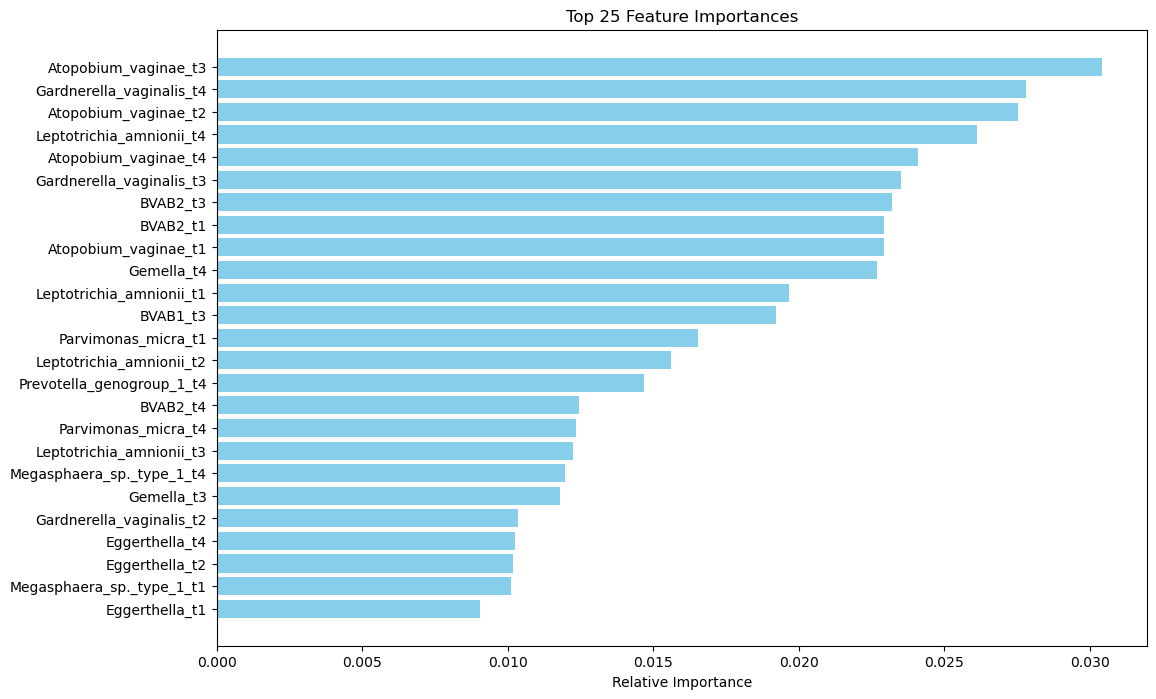

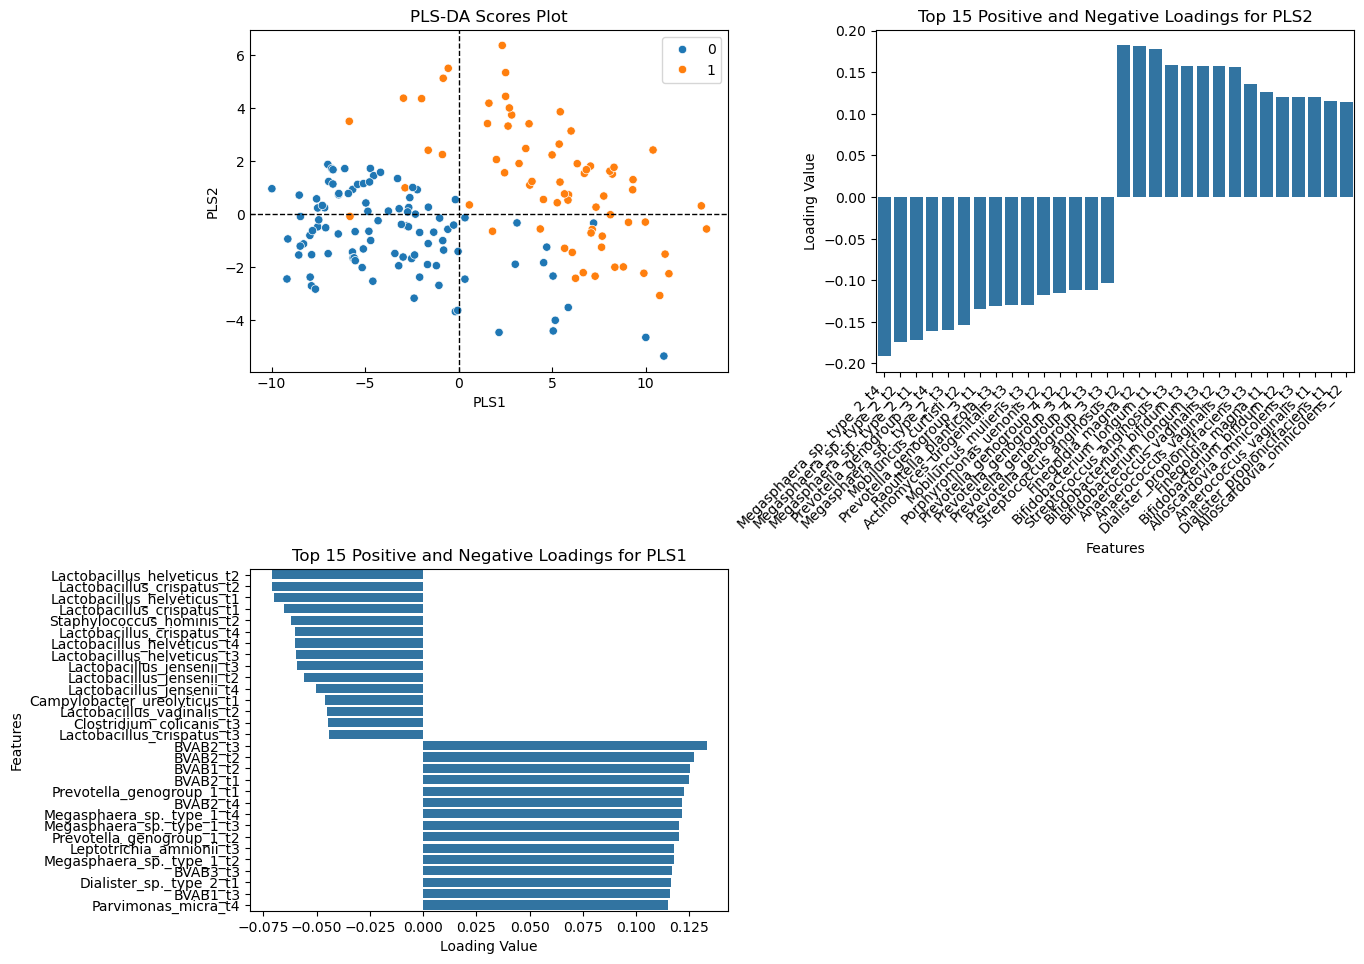

accuracy  precision  recall    f1  specificity   mse  \
Random Forest            0.81       0.80    0.72  0.75         0.87  0.19   
Logistic Regression      0.78       0.74    0.70  0.72         0.83  0.22   
Linear SVM               0.75       0.69    0.68  0.69         0.79  0.25   
RBF SVM                  0.80       0.73    0.81  0.77         0.79  0.20   
K-Nearest Neighbors      0.80       0.78    0.71  0.74         0.86  0.20   
Gradient Boosting        0.74       0.68    0.68  0.68         0.78  0.26   
PLS-DA                   0.81       0.78    0.72  0.75         0.86  0.19   
Random Guess             0.60       0.00    0.00  0.00         1.00  0.40   

                      auc  
Random Forest        0.78  
Logistic Regression  0.72  
Linear SVM           0.72  
RBF SVM              0.79  
K-Nearest Neighbors  0.68  
Gradient Boosting    0.67  
PLS-DA               0.80  
Random Guess         0.70

In [1]:
# HMP whole data
import warnings
# Suppress all warnings globally
warnings.filterwarnings("ignore")
from QE_functions import *
df = df_abundance_nugent(filename=None, log=True, rel_abund=False, zscore=False,cst=False, metabolomics=False)
X, y = menstruation_xblock_y_premensesX(df, menses_included=False,four_labels=False, multistability=False) #X=premenses data
print(np.unique(y, return_counts=True))
X, y = drop_blocks(X,y,thres=4)
#(X_1, y_1), (X_2, y_2), (X_3, y_3), (X_4, y_4), (X_5, y_5) = split_blocks_by_CST_most_frequent(X, y, equal_selection=False)
df = flatten(X)
random_forest_model(df,y)
RForest_top_features_plot(df,y,numb_features=30)
scores, loadings = plsda_scores_loading(df,y,numb_loadings=15, orthogonalize=True)
all_model_evaluation(df,y,test=True,n_splits=3)

In [8]:
#save for elastic net
matlab_ddm_save_data(df,y)

In [4]:
#PLSDA_plots(df, y, num_components=2, orthogonalize=True)

In [9]:
#Run with selected features using elastic net
import pandas as pd 
df = pd.read_csv('Data_Nugent_x=premenses/X_whole_samples_top_features.csv')
df = df.iloc[:,1:]
all_model_evaluation(df,y,test=True,n_splits=3)

accuracy  precision  recall    f1  specificity   mse  \
Random Forest            0.81       0.79    0.74  0.76         0.86  0.19   
Logistic Regression      0.83       0.83    0.74  0.78         0.89  0.17   
Linear SVM               0.83       0.82    0.75  0.78         0.88  0.17   
RBF SVM                  0.84       0.78    0.84  0.81         0.84  0.16   
K-Nearest Neighbors      0.77       0.71    0.72  0.72         0.80  0.23   
Gradient Boosting        0.78       0.76    0.67  0.71         0.86  0.22   
PLS-DA                   0.88       0.86    0.84  0.85         0.91  0.12   
Random Guess             0.60       0.00    0.00  0.00         1.00  0.40   

                      auc  
Random Forest        0.87  
Logistic Regression  0.88  
Linear SVM           0.88  
RBF SVM              0.88  
K-Nearest Neighbors  0.81  
Gradient Boosting    0.78  
PLS-DA               0.89  
Random Guess         0.70

In [1]:
# Gajer Cohort
from QE_functions import *
df = Gajer_preprocessing_data(log=True, rel_abund=False, zscore=False)
X, y = menstruation_xblock_y_premensesX(df,menses_included=False,four_labels=False, multistability=False) #X=premenses data
print(np.unique(y, return_counts=True))
X, y = drop_blocks(X,y,thres=4)
for block in X:
    block.drop(columns=['CST_HL'],inplace=True)

log transformed data
Number of x_blocks (X): 116
Shape of labels (y): (116,)
(array([0, 1]), array([70, 46]))
Filtered number of x_blocks: 76
Filtered shape of labels (y): (76,)
Number of 1s: 30
Number of 0s: 46


Cross-validation scores: [0.9375     0.86666667 0.8        0.73333333 0.86666667]
Mean cross-validation accuracy: 0.84


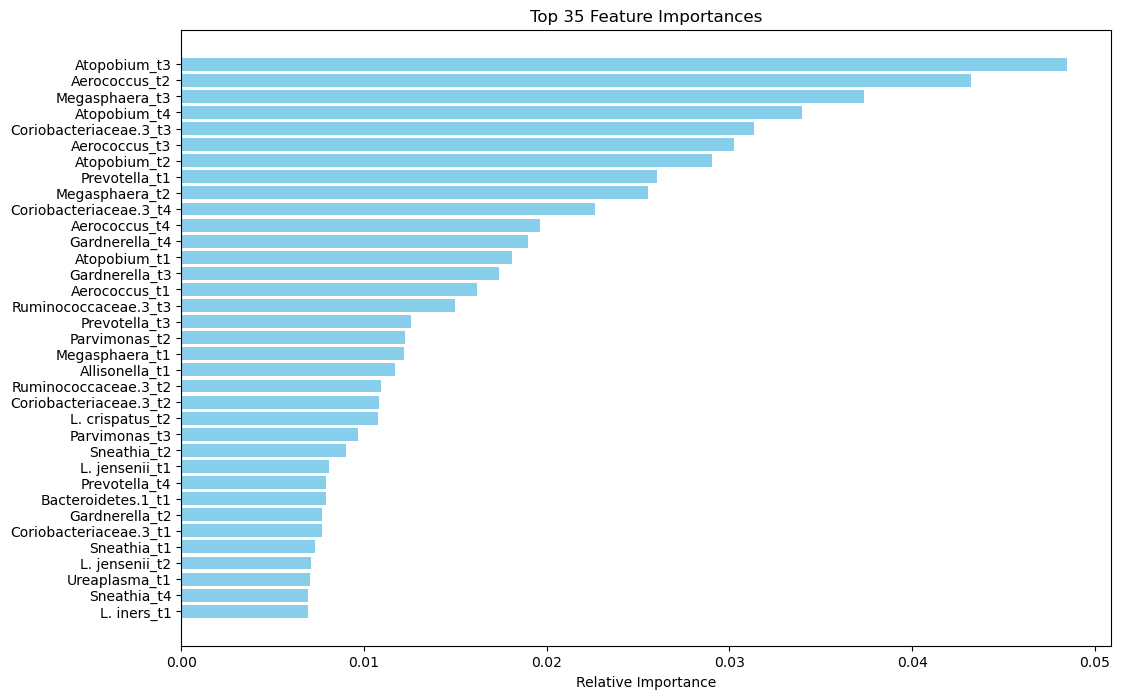

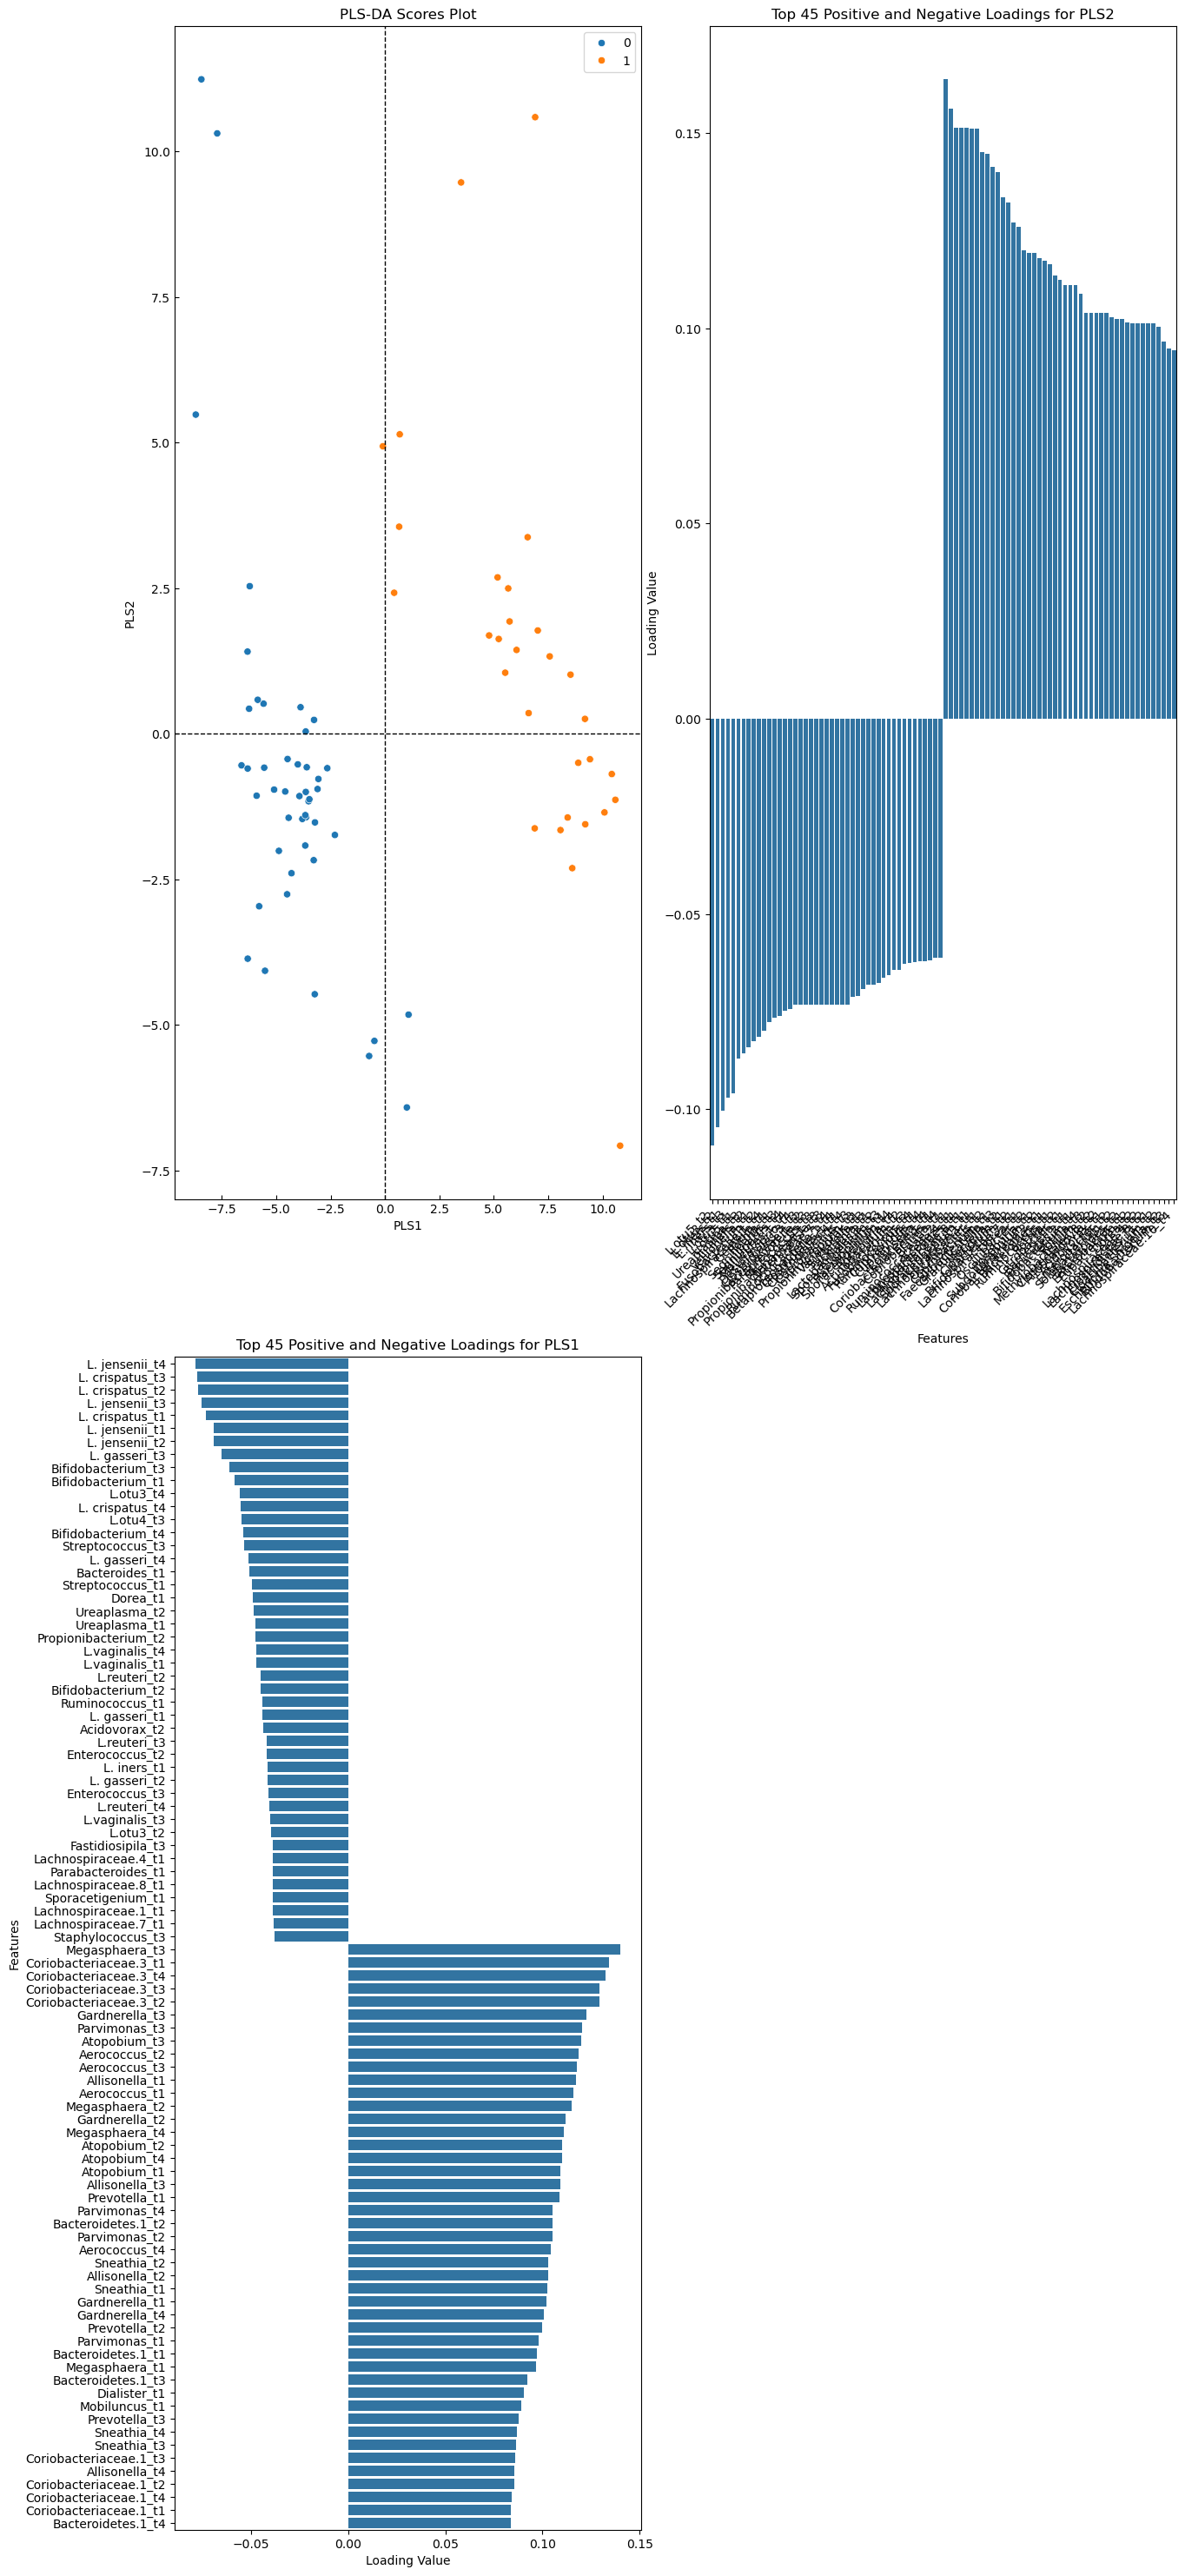

accuracy  precision  recall    f1  specificity   mse  \
Random Forest            0.85       0.83    0.80  0.81         0.89  0.15   
Logistic Regression      0.84       0.83    0.77  0.79         0.89  0.16   
Linear SVM               0.83       0.77    0.80  0.79         0.85  0.17   
RBF SVM                  0.85       0.83    0.80  0.81         0.89  0.15   
K-Nearest Neighbors      0.84       0.80    0.80  0.80         0.87  0.16   
Gradient Boosting        0.80       0.82    0.70  0.73         0.87  0.20   
PLS-DA                   0.87       0.86    0.80  0.83         0.91  0.13   
Random Guess             0.61       0.00    0.00  0.00         1.00  0.39   

                      auc  
Random Forest        0.92  
Logistic Regression  0.88  
Linear SVM           0.83  
RBF SVM              0.90  
K-Nearest Neighbors  0.88  
Gradient Boosting    0.84  
PLS-DA               0.88  
Random Guess         0.70

In [3]:
df = flatten(X)
random_forest_model(df,y)
RForest_top_features_plot(df,y,numb_features=35)
scores, loadings = plsda_scores_loading(df,y,numb_loadings=45, orthogonalize=True)
all_model_evaluation(df,y,test=True,n_splits=3)

In [5]:
#save for elastic net
matlab_ddm_save_data(df,y)

In [6]:
#Run with selected features using elastic net
import pandas as pd 
df = pd.read_csv('Gajer_Elastic_Net/Whole_samples/X_Gajer_whole_samples_top_features.csv')
df = df.iloc[:,1:]
all_model_evaluation(df,y,test=True,n_splits=3)

accuracy  precision  recall    f1  specificity   mse  \
Random Forest            0.89       0.93    0.80  0.86         0.96  0.11   
Logistic Regression      0.95       0.97    0.90  0.93         0.98  0.05   
Linear SVM               0.95       1.00    0.87  0.93         1.00  0.05   
RBF SVM                  0.92       0.94    0.87  0.90         0.96  0.08   
K-Nearest Neighbors      0.89       0.87    0.87  0.87         0.91  0.11   
Gradient Boosting        0.89       0.92    0.83  0.87         0.93  0.11   
PLS-DA                   0.95       1.00    0.87  0.93         1.00  0.05   
Random Guess             0.61       0.00    0.00  0.00         1.00  0.39   

                      auc  
Random Forest        0.96  
Logistic Regression  0.99  
Linear SVM           0.99  
RBF SVM              0.97  
K-Nearest Neighbors  0.95  
Gradient Boosting    0.94  
PLS-DA               0.99  
Random Guess         0.70

log transformed data
Number of x_blocks (X): 205
Shape of labels (y): (205,)
(array([0, 1]), array([122,  83]))
Filtered number of x_blocks: 146
Filtered shape of labels (y): (146,)
Number of 1s: 59
Number of 0s: 87
length of X_1 and y_1:  29 29
length of X_2 and y_2:  20 20
length of X_3 and y_3:  41 41
length of X_4 and y_4:  43 43
length of X_5 and y_5:  4 4
Cross-validation scores: [0.66666667 0.66666667 0.77777778 0.625      0.75      ]
Mean cross-validation accuracy: 0.70


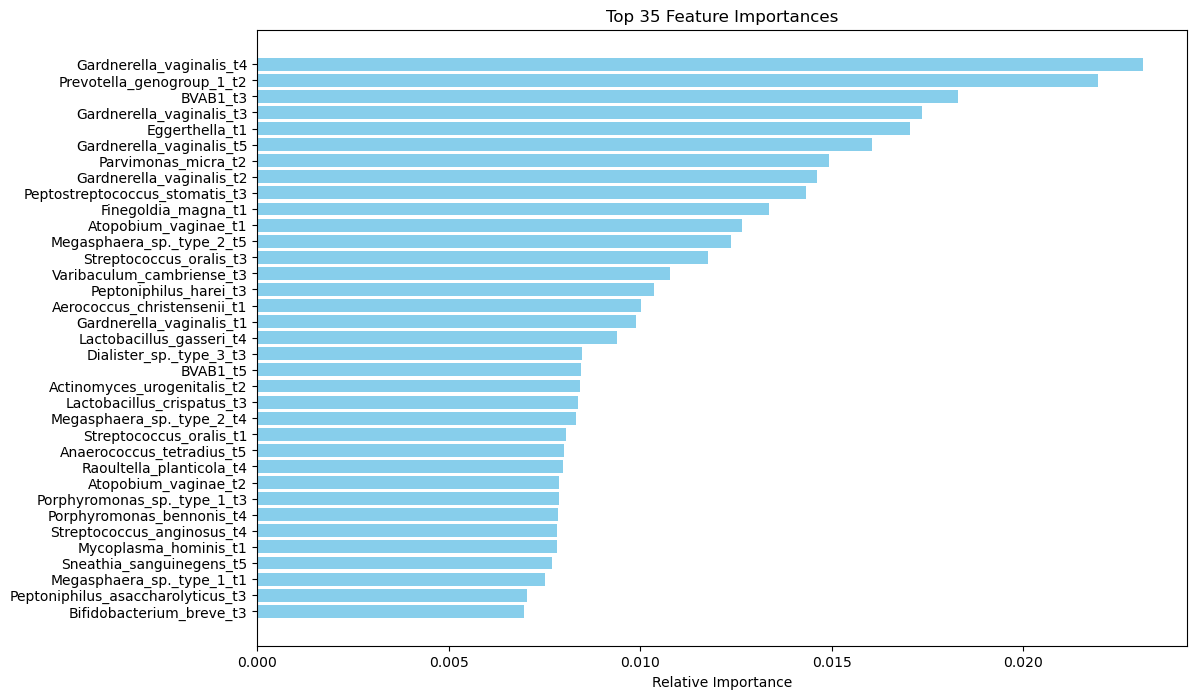

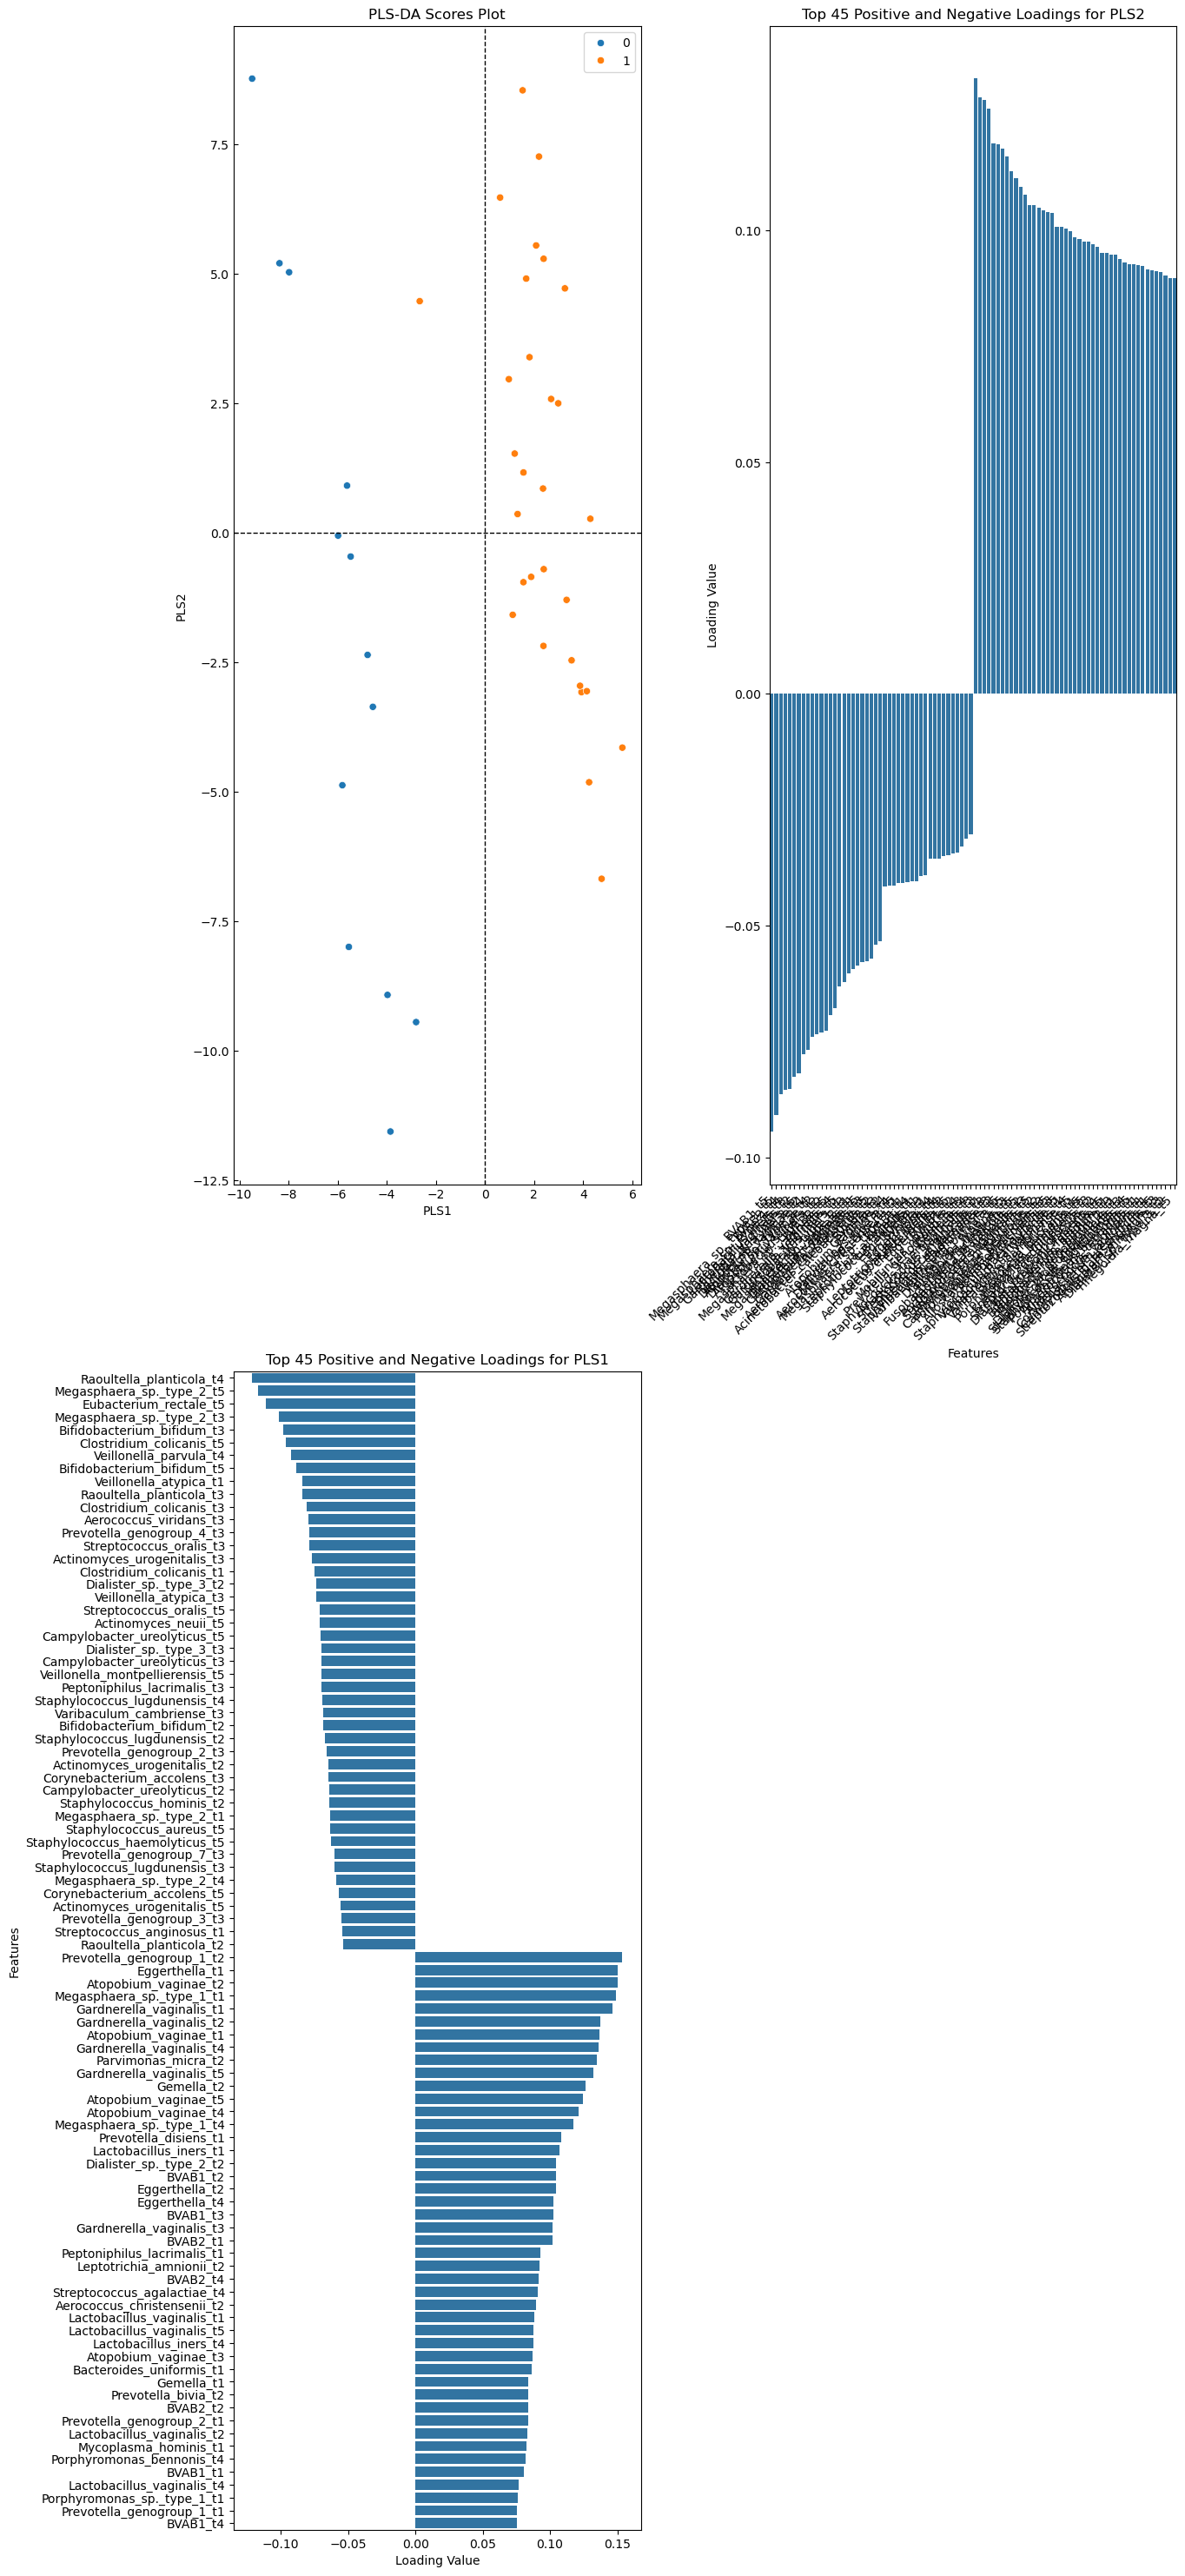

accuracy  precision  recall    f1  specificity   mse  \
Random Forest            0.72       0.74    0.93  0.82         0.23  0.28   
Logistic Regression      0.65       0.72    0.83  0.77         0.25  0.35   
Linear SVM               0.63       0.74    0.77  0.74         0.33  0.37   
RBF SVM                  0.65       0.70    0.87  0.77         0.17  0.35   
K-Nearest Neighbors      0.65       0.68    0.93  0.79         0.00  0.35   
Gradient Boosting        0.68       0.76    0.80  0.78         0.40  0.32   
PLS-DA                   0.60       0.71    0.73  0.72         0.32  0.40   
Random Guess             0.70       0.70    1.00  0.82         0.00  0.30   

                      auc  
Random Forest        0.84  
Logistic Regression  0.83  
Linear SVM           0.78  
RBF SVM              0.61  
K-Nearest Neighbors  0.75  
Gradient Boosting    0.87  
PLS-DA               0.83  
Random Guess         0.85

In [7]:
# HMP CST-IV data
import warnings
# Suppress all warnings globally
warnings.filterwarnings("ignore")
from QE_functions import *
df = df_abundance_nugent(filename=None, log=True, rel_abund=False, zscore=False,cst=True, metabolomics=False)
X, y = menstruation_xblock_y_premensesX(df, menses_included=False,four_labels=False, multistability=False) #X=premenses data
print(np.unique(y, return_counts=True))
X, y = drop_blocks(X,y,thres=4)
(X_1, y_1), (X_2, y_2), (X_3, y_3), (X_4, y_4), (X_5, y_5) = split_blocks_by_CST_most_frequent(X, y, equal_selection=False)
df_4 = flatten(X_4)
random_forest_model(df_4,y_4)
RForest_top_features_plot(df_4,y_4,numb_features=35)
scores, loadings = plsda_scores_loading(df_4,y_4,numb_loadings=45, orthogonalize=True)
all_model_evaluation(df_4,y_4,test=True,n_splits=3)

relative abundance data
Number of x_blocks (X): 116
Shape of labels (y): (116,)
(array([0, 1]), array([70, 46]))
Filtered number of x_blocks: 76
Filtered shape of labels (y): (76,)
Number of 1s: 30
Number of 0s: 46
length of X_1 and y_1:  15 15
length of X_2 and y_2:  2 2
length of X_3 and y_3:  30 30
length of X_4 and y_4:  28 28
length of X_5 and y_5:  0 0
Cross-validation scores: [0.83333333 0.83333333 0.83333333 1.         0.8       ]
Mean cross-validation accuracy: 0.86


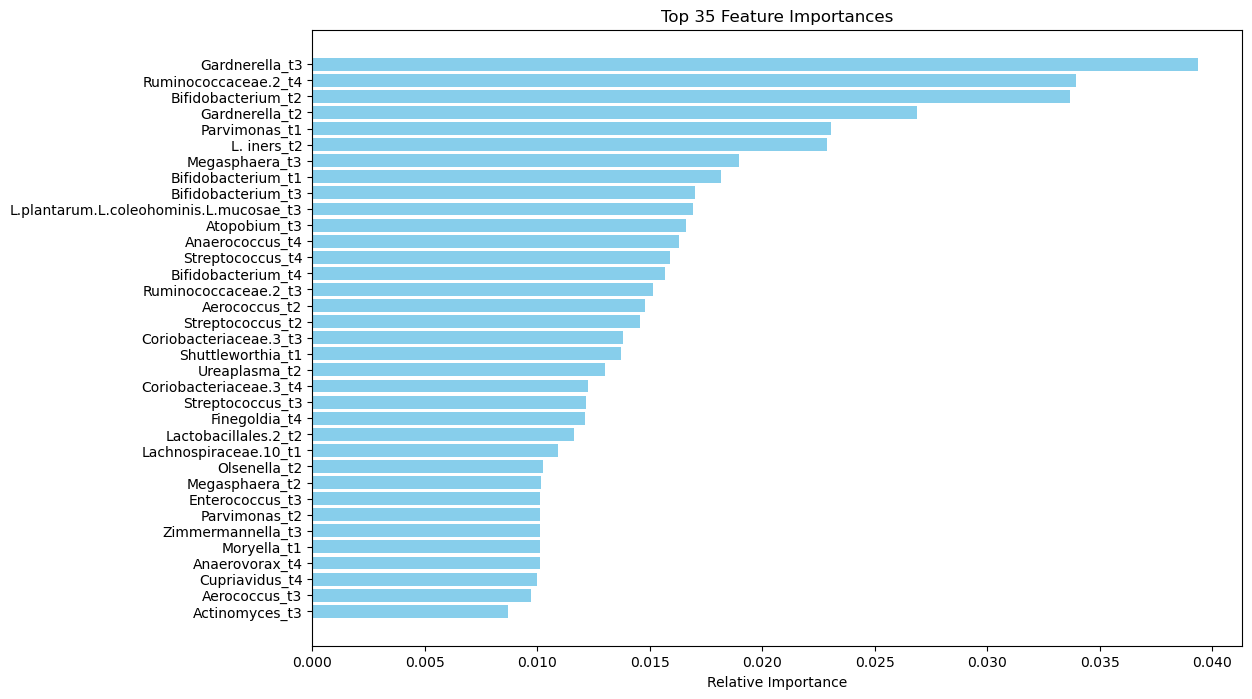

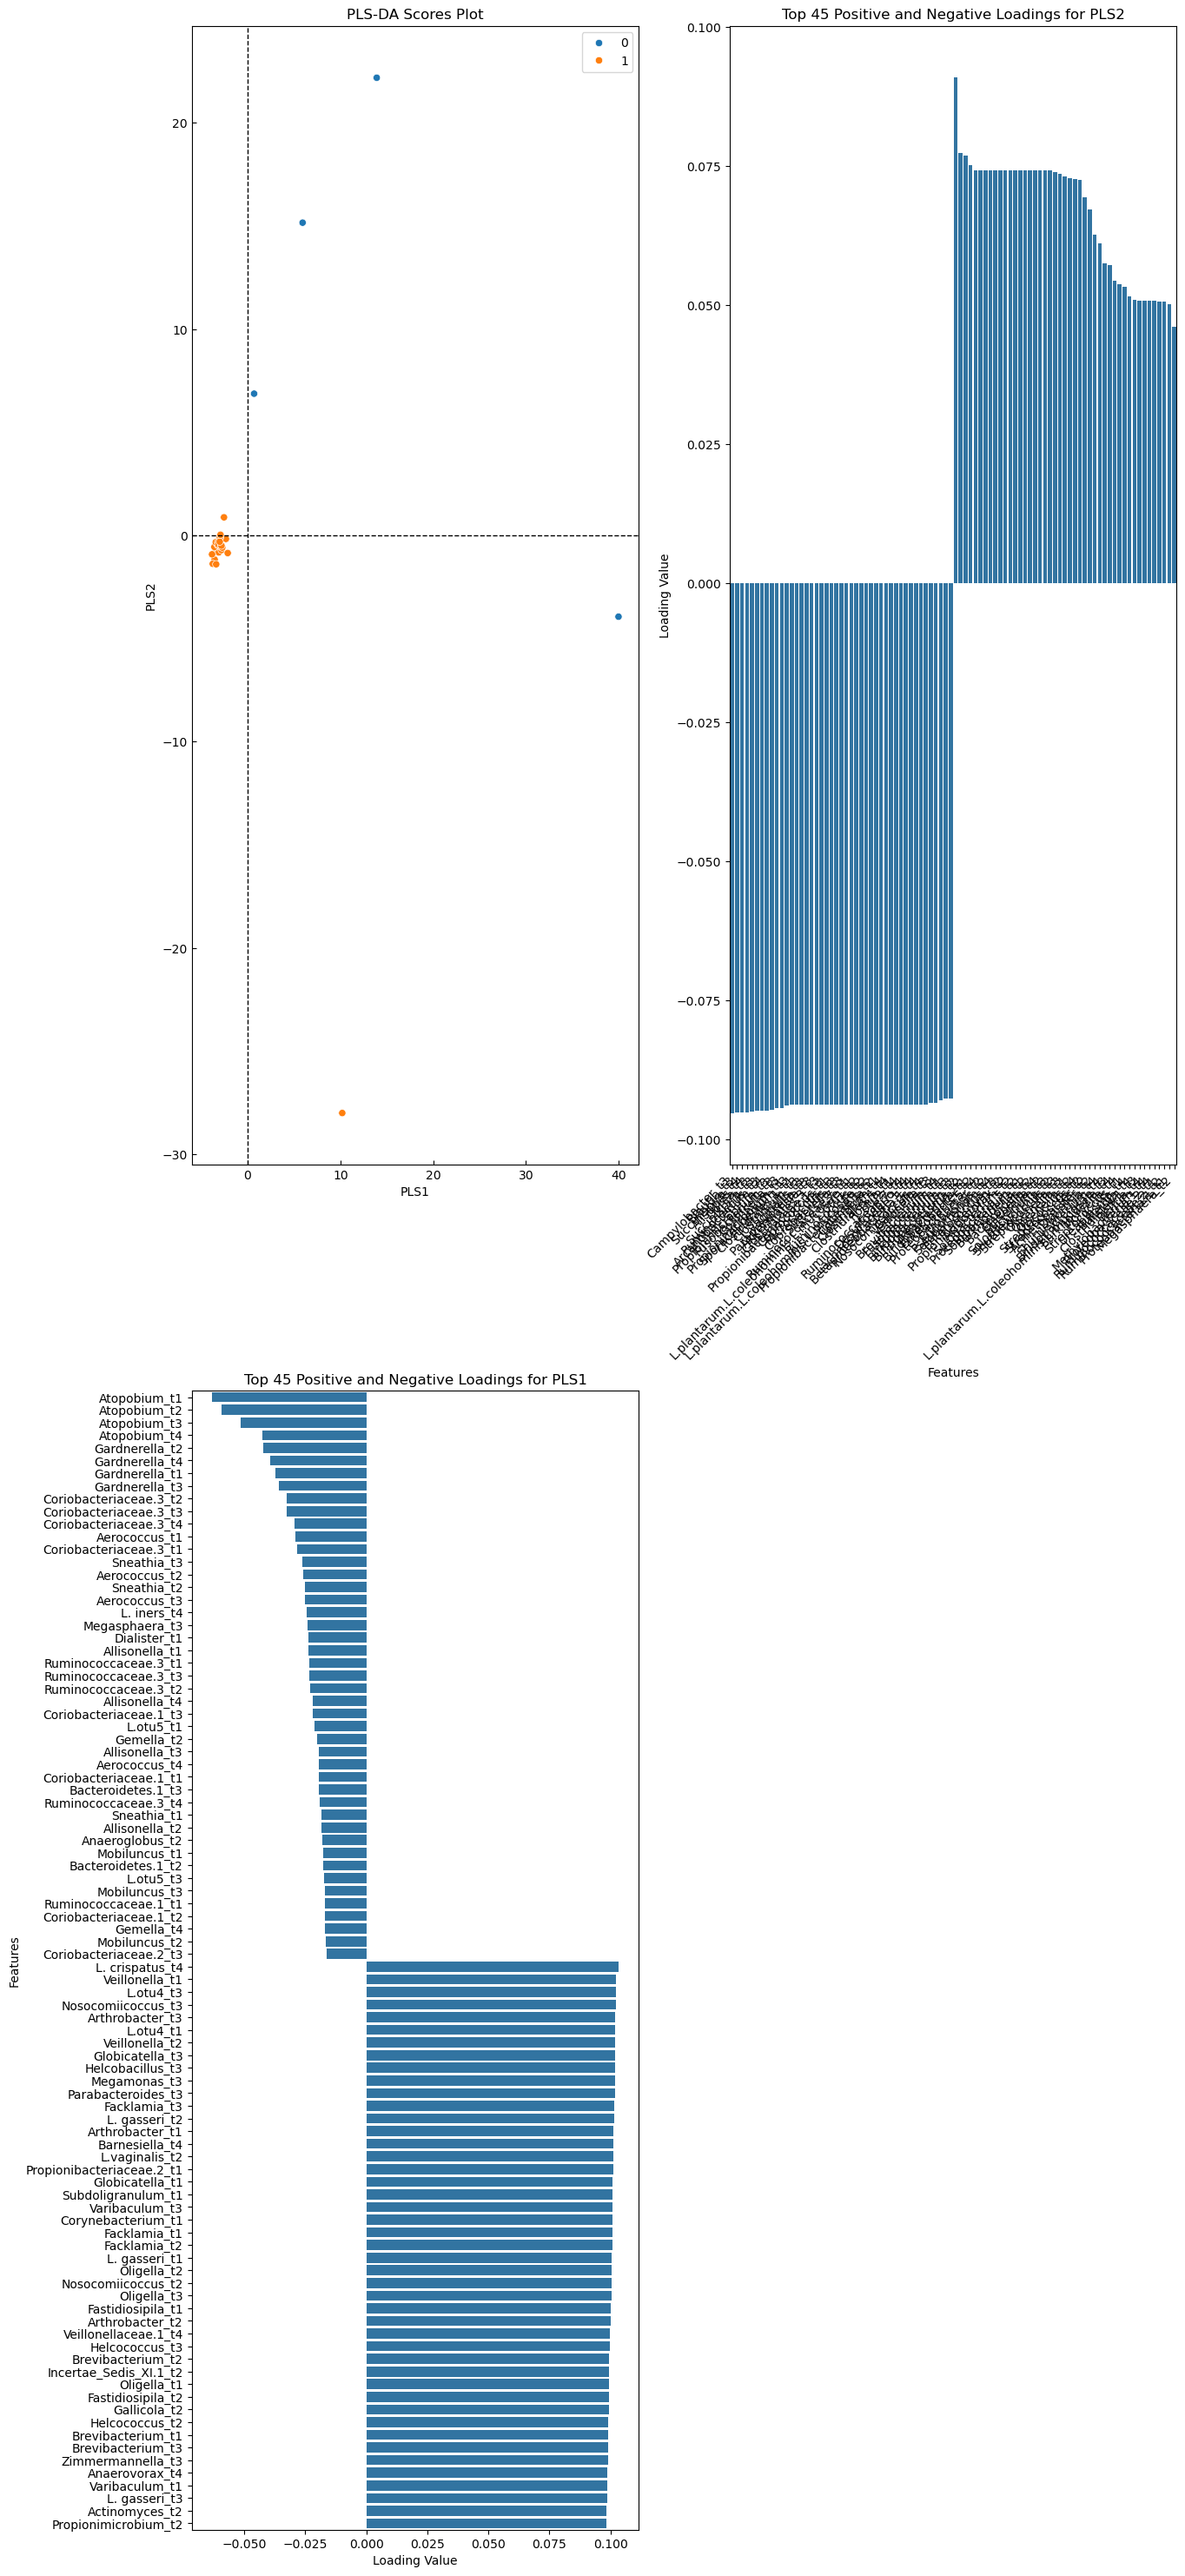

accuracy  precision  recall    f1  specificity   mse  \
Random Forest            0.86       0.86    1.00  0.92         0.00  0.14   
Logistic Regression      0.86       0.86    1.00  0.92         0.00  0.14   
Linear SVM               0.86       0.86    1.00  0.92         0.00  0.14   
RBF SVM                  0.86       0.89    0.96  0.92         0.33  0.14   
K-Nearest Neighbors      0.86       0.86    1.00  0.92         0.00  0.14   
Gradient Boosting        0.79       0.85    0.92  0.88         0.00  0.21   
PLS-DA                   0.86       0.89    0.96  0.92         0.33  0.14   
Random Guess             0.86       0.86    1.00  0.92         0.00  0.14   

                      auc  
Random Forest        0.93  
Logistic Regression  0.95  
Linear SVM           0.91  
RBF SVM              0.77  
K-Nearest Neighbors  0.95  
Gradient Boosting    0.93  
PLS-DA               0.86  
Random Guess         0.93

In [8]:
# Gajer CST-IV data
# Gajer Cohort
from QE_functions import *
df = Gajer_preprocessing_data(log=False, rel_abund=True, zscore=False)
X, y = menstruation_xblock_y_premensesX(df,menses_included=False,four_labels=False, multistability=False) #X=premenses data
print(np.unique(y, return_counts=True))
X, y = drop_blocks(X,y,thres=4)
(X_1, y_1), (X_2, y_2), (X_3, y_3), (X_4, y_4), (X_5, y_5) = split_blocks_by_CST_most_frequent(X, y, equal_selection=False)
df_4 = flatten(X_4)
random_forest_model(df_4,y_4)
RForest_top_features_plot(df_4,y_4,numb_features=35)
scores, loadings = plsda_scores_loading(df_4,y_4,numb_loadings=45, orthogonalize=False)
all_model_evaluation(df_4,y_4,test=True,n_splits=3)

In [23]:
#save for elastic net
matlab_ddm_save_data(df_4,y_4)

# April 16 : train on HMP, test on Gajer

In [1]:
# HMP data
import warnings
# Suppress all warnings globally
warnings.filterwarnings("ignore")
from QE_functions import *
df_hmp = df_abundance_nugent(filename=None, log=False, rel_abund=True, zscore=False,cst=False, metabolomics=False)
# Gajer data
df_gajer = Gajer_preprocessing_data(log=False, rel_abund=True, zscore=False)
#filtering: select common hmp and gajer features 
df_hmp_filtered, df_gajer_filtered = common_feature_selection_in_2_dataframes(df_hmp,df_gajer,rename_dict=None)



relative abundance data
relative abundance data


In [2]:
X_train, y_train = menstruation_xblock_y_premensesX(df_hmp_filtered, premenses_included=True, menses_included=False,four_labels=False, multistability=False) #X=premenses data
print(np.unique(y_train, return_counts=True))
X_train, y_train = drop_blocks(X_train,y_train,thres=4)
#(X_1, y_1), (X_2, y_2), (X_3, y_3), (X_4, y_4), (X_5, y_5) = split_blocks_by_CST_most_frequent(X, y, equal_selection=False)
df_train = flatten(X_train)
#random_forest_model(df_train,y_train)
#RForest_top_features_plot(df_train,y_train,numb_features=30)
#plsda_scores_loading(df_train,y_train,numb_loadings=25, orthogonalize=True)
#all_model_evaluation(df_train,y_train,test=True,n_splits=3)

Number of x_blocks (X): 239
Shape of labels (y): (239,)
(array([0, 1]), array([141,  98]))
Filtered number of x_blocks: 171
Filtered shape of labels (y): (171,)
Number of 1s: 69
Number of 0s: 102


In [3]:
# Gajer Cohort
X_test, y_test = menstruation_xblock_y_premensesX(df_gajer_filtered,premenses_included=True, menses_included=False,four_labels=False, multistability=False) #X=premenses data
print(np.unique(y_test, return_counts=True))
X_test, y_test = drop_blocks(X_test,y_test,thres=4)


df_test = flatten(X_test)
#random_forest_model(df_test,y_test)
#RForest_top_features_plot(df_test,y_test,numb_features=35)
#plsda_scores_loading(df_test,y_test,numb_loadings=25, orthogonalize=True)
#all_model_evaluation(df_test,y_test,test=True,n_splits=3)

Number of x_blocks (X): 116
Shape of labels (y): (116,)
(array([0, 1]), array([70, 46]))
Filtered number of x_blocks: 76
Filtered shape of labels (y): (76,)
Number of 1s: 30
Number of 0s: 46


In [5]:
table = evaluate_classifiers(df_train, df_test, y_train, y_test)
table

Model  Accuracy  Precision    Recall  F1 Score  \
0                 Random Forest  0.842105   0.950000  0.633333  0.760000   
1           Logistic Regression  0.881579   0.920000  0.766667  0.836364   
2                    Linear SVM  0.842105   0.821429  0.766667  0.793103   
3                       RBF SVM  0.855263   0.952381  0.666667  0.784314   
4                           KNN  0.868421   0.884615  0.766667  0.821429   
5                          GBDT  0.697368   0.684211  0.433333  0.530612   
6                        PLS-DA  0.828947   0.840000  0.700000  0.763636   
7  Random Guess (Most Frequent)  0.605263   0.000000  0.000000  0.000000   

   Specificity       MSE       AUC  
0     0.978261  0.157895  0.855435  
1     0.956522  0.118421  0.897826  
2     0.891304  0.157895  0.897101  
3     0.978261  0.144737  0.881884  
4     0.934783  0.131579  0.871739  
5     0.869565  0.302632  0.776087  
6     0.913043  0.171053  0.776087  
7     1.000000  0.394737  0.500000

In [6]:
lstm_model_train_test(X_train, y_train, X_test, y_test, padding_value=-10000)

I0000 00:00:1756411638.217511 2960898 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1756411638.217581 2960898 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/100


E0000 00:00:1756411639.394252 2960898 meta_optimizer.cc:966] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 372ms/step - accuracy: 0.6370 - loss: 0.8811 - val_accuracy: 0.8421 - val_loss: 0.6531
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7076 - loss: 0.7650 - val_accuracy: 0.6184 - val_loss: 0.6055
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6072 - loss: 0.9794 - val_accuracy: 0.8553 - val_loss: 0.4987
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7558 - loss: 0.6431 - val_accuracy: 0.6184 - val_loss: 0.5790
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6452 - loss: 0.8330 - val_accuracy: 0.8553 - val_loss: 0.4257
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7144 - loss: 0.7734 - val_accuracy: 0.6842 - val_loss: 0.5900
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7385 - loss: 0.7967 - val_accuracy: 0.7500 - val_loss: 0.4862
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7523 - loss: 0.5658 - val_accuracy: 0.8289 - val_loss: 0.4763
Epo

(0.868421052631579,
 0.8846153846153846,
 0.7666666666666667,
 0.8214285714285714,
 0.9347826086956522,
 0.13157894736842105,
 0.8898550724637682)

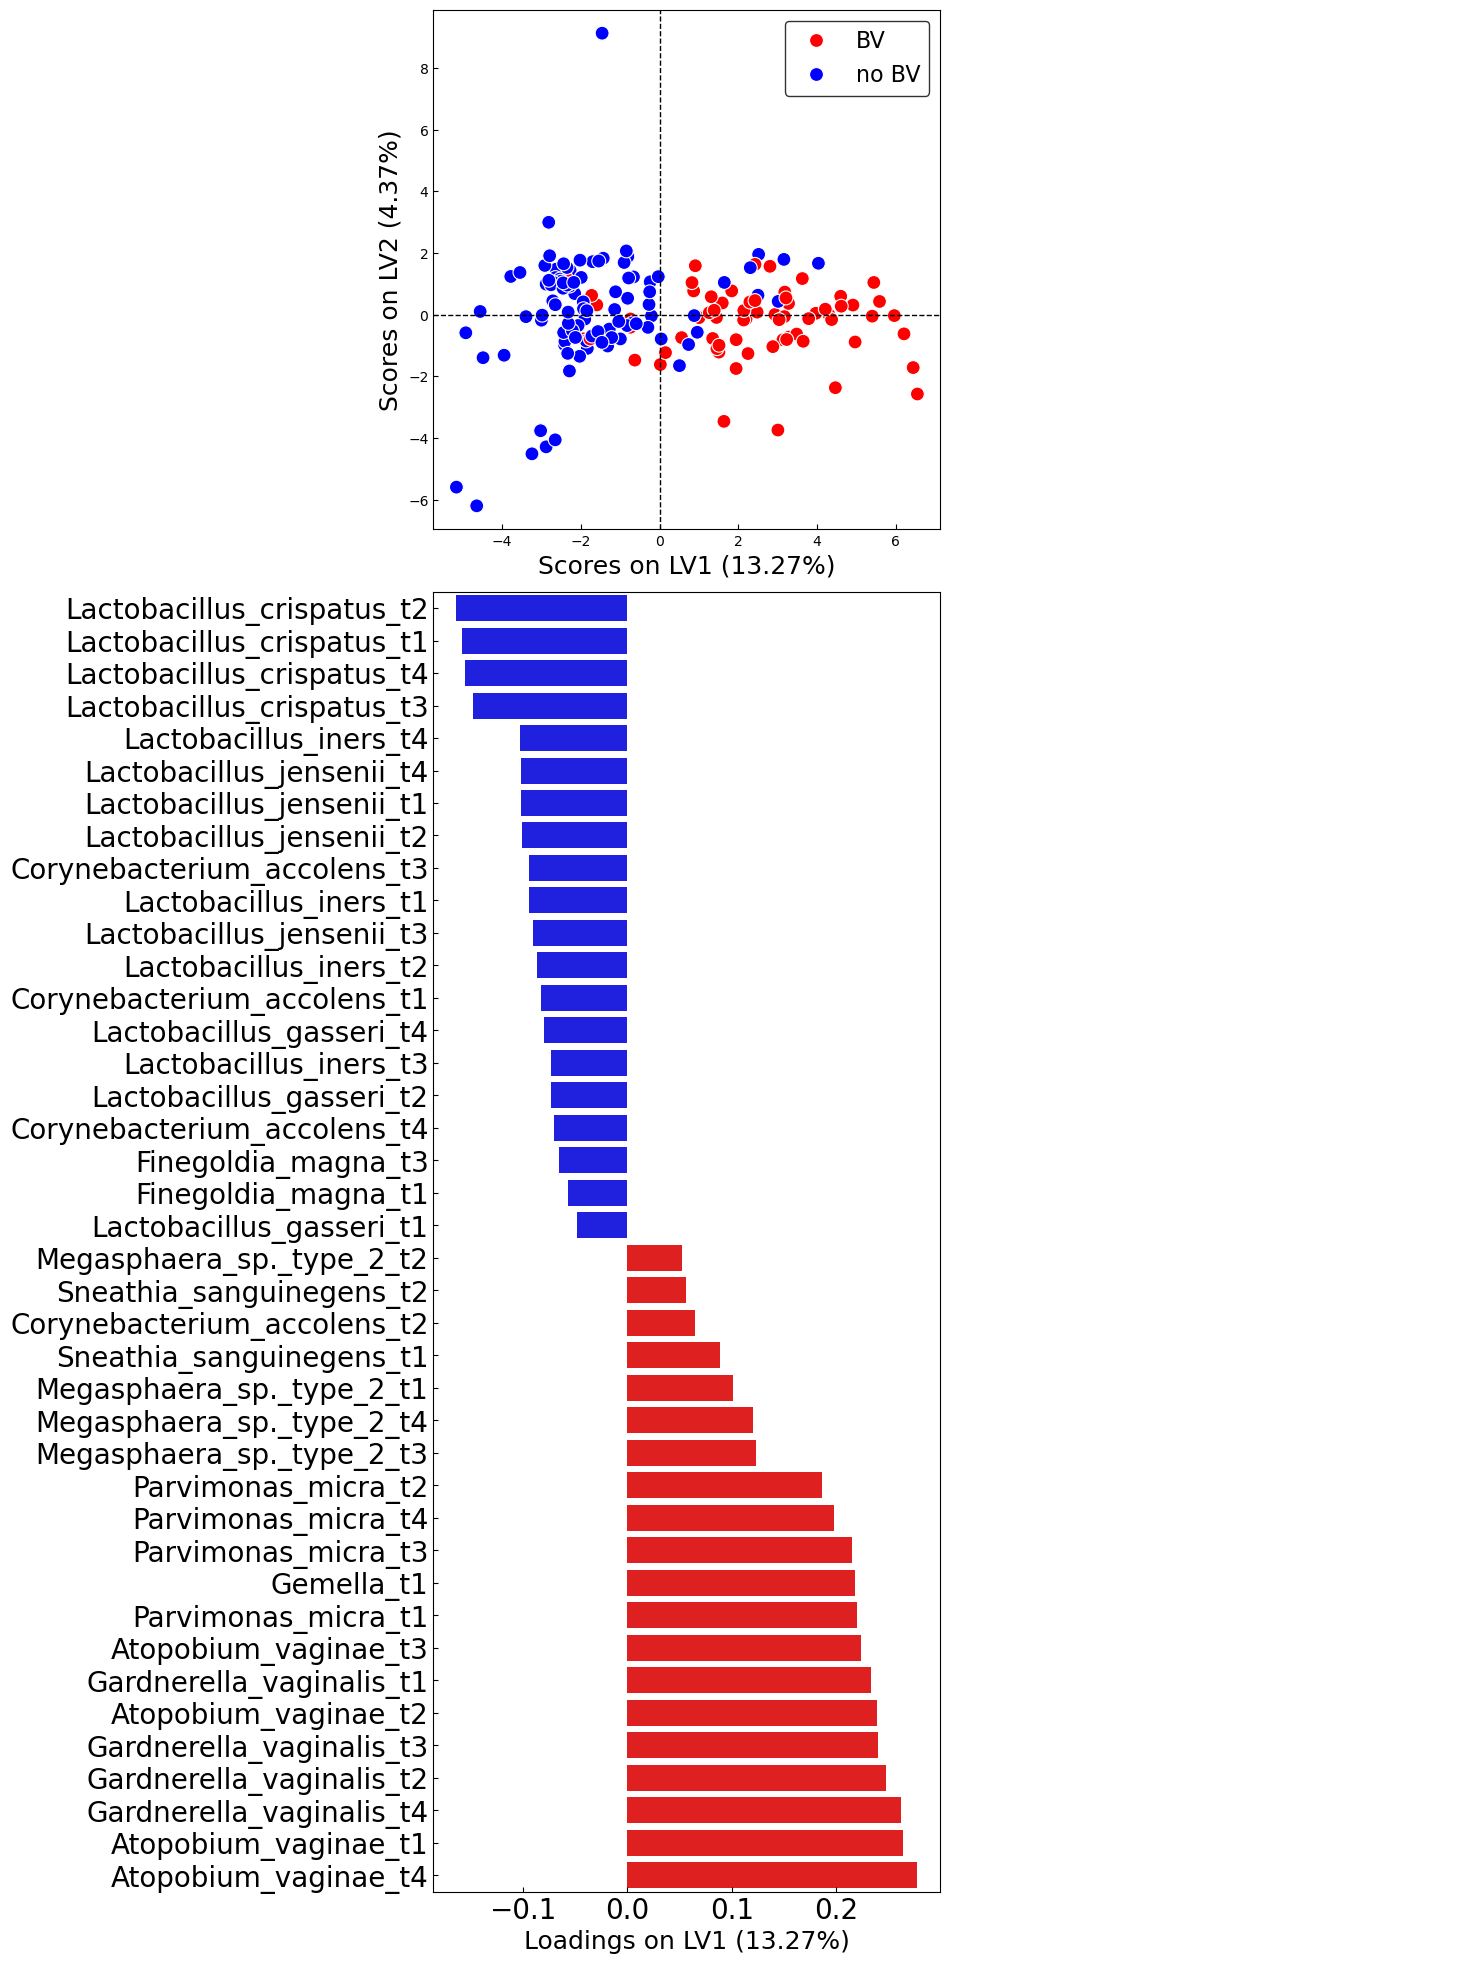

In [7]:
PLSDA_plots(df_train, y_train, num_components=2, orthogonalize=True, num_loadings=20, LV1=True, LV2=False)

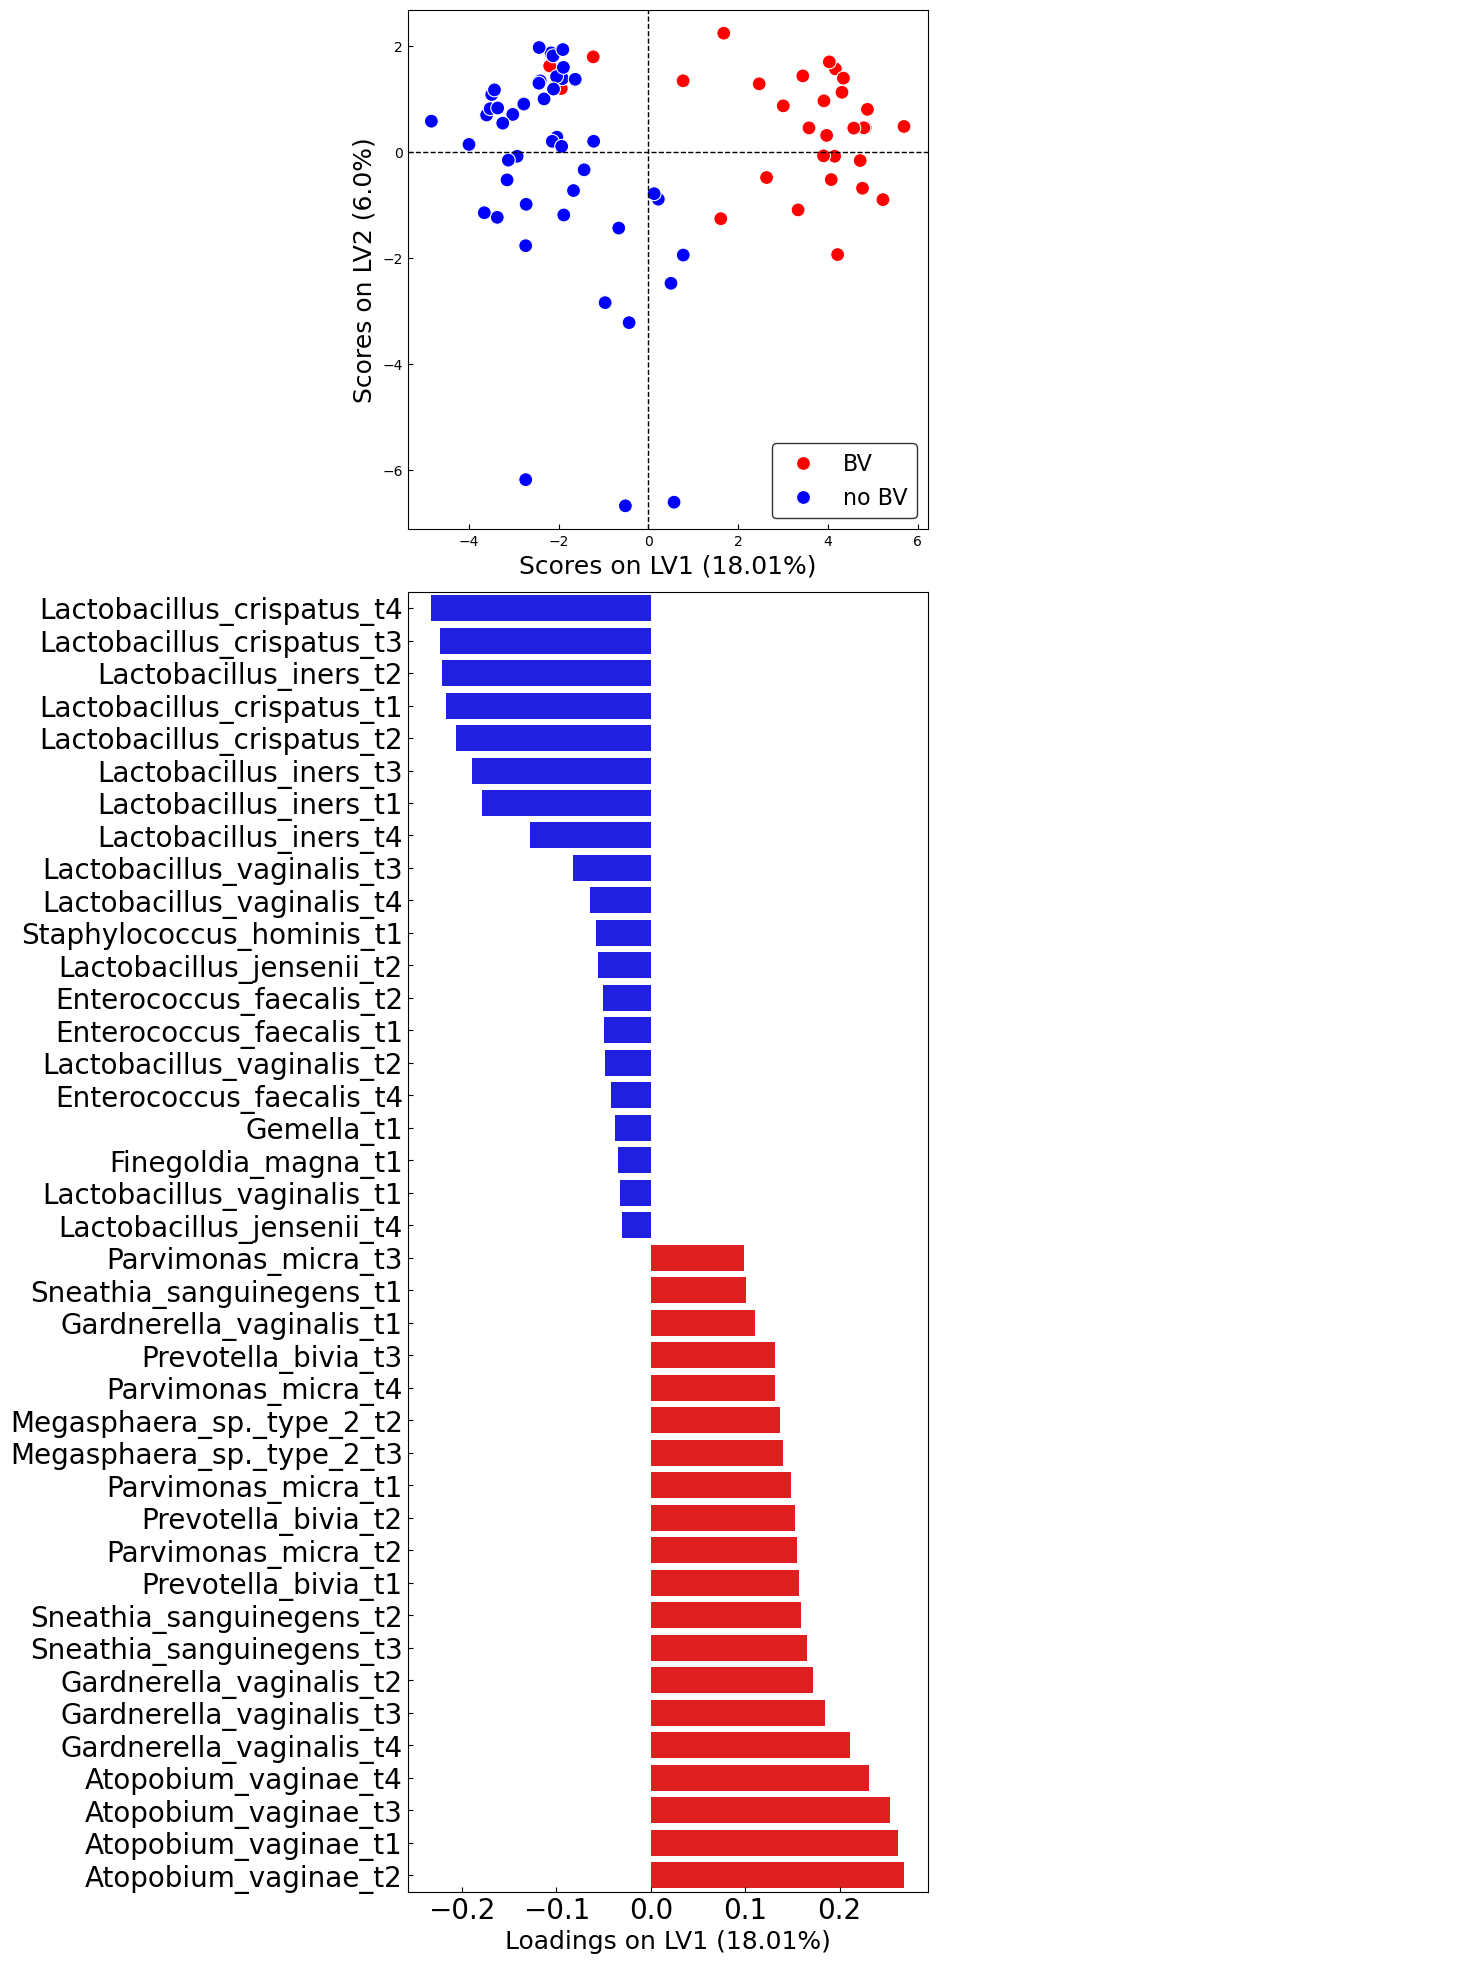

In [8]:
PLSDA_plots(df_test, y_test, num_components=2, orthogonalize=True, num_loadings=20, LV1=True, LV2=False)

Found that once I work with log transformed data, multiple ML models such as RF doesn't work. However, by training on relative abundance data models work perfectly. rel abund outputs reported for the first paragraph of BMES

# CST-III gajer used common features with HMP

log transformed data
Number of x_blocks (X): 116
Shape of labels (y): (116,)
Filtered number of x_blocks: 76
Filtered shape of labels (y): (76,)
Number of 1s: 30
Number of 0s: 46
length of X_1 and y_1:  15 15
length of X_2 and y_2:  2 2
length of X_3 and y_3:  30 30
length of X_4 and y_4:  28 28
length of X_5 and y_5:  0 0


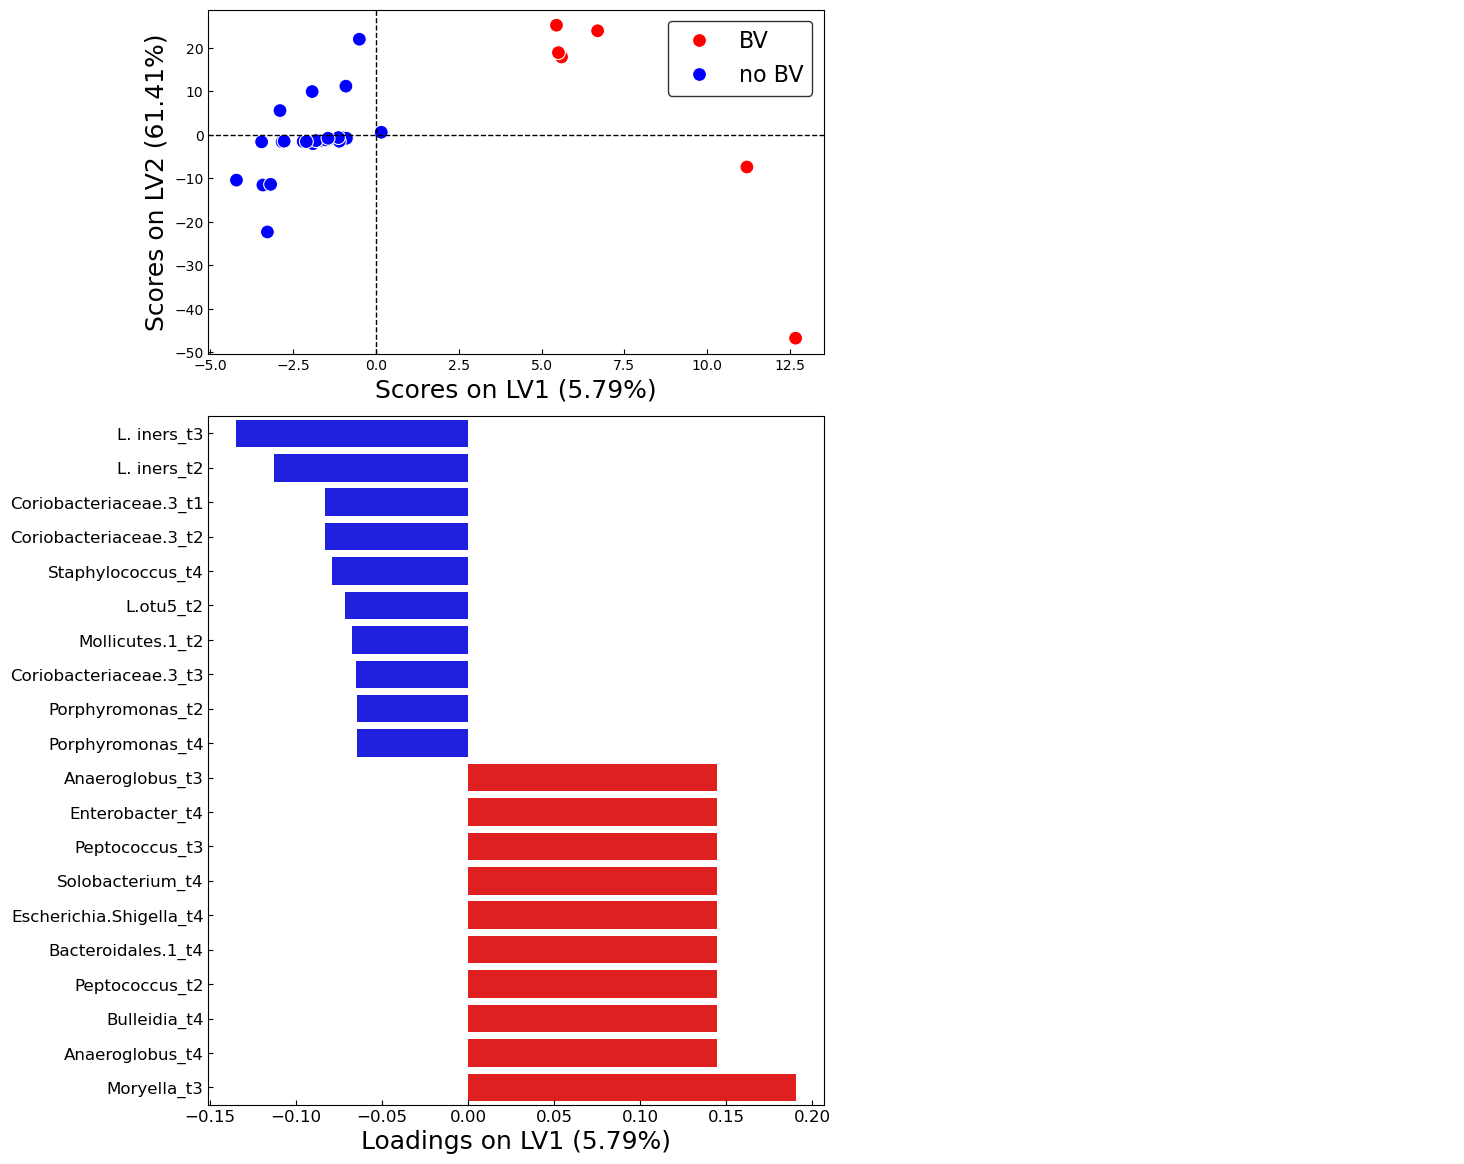

In [3]:
# HMP data
import warnings
# Suppress all warnings globally
warnings.filterwarnings("ignore")
from QE_functions import *
#df_hmp = df_abundance_nugent(filename=None, log=True, rel_abund=False, zscore=False,cst=True, metabolomics=False)
# Gajer data
df_gajer = Gajer_preprocessing_data(log=True, rel_abund=False, zscore=False)
#filtering: select common hmp and gajer features 
df_hmp_filtered, df_gajer_filtered = common_feature_selection_in_2_dataframes(df_hmp,df_gajer,rename_dict=None)
df_gajer_filtered['CST_HL'] = df_gajer['CST_HL']
# Gajer Cohort
X, y = menstruation_xblock_y_premensesX(df_gajer,premenses_included=True,menses_included=False,four_labels=False, multistability=False) #X=premenses data

X, y = drop_blocks(X,y,thres=4)
(X_1, y_1), (X_2, y_2), (X_3, y_3), (X_4, y_4), (X_5, y_5) = split_blocks_by_CST_most_frequent(X, y, equal_selection=False)




df_3 = flatten(X_3)
PLSDA_plots(df_3, y_3, num_components=2, orthogonalize=True, num_loadings=10, LV1=True, LV2=False)
#random_forest_model(df_test,y_test)
#RForest_top_features_plot(df_test,y_test,numb_features=35)
#plsda_scores_loading(df_test,y_test,numb_loadings=25, orthogonalize=True)
#all_model_evaluation(df_test,y_test,test=True,n_splits=3)

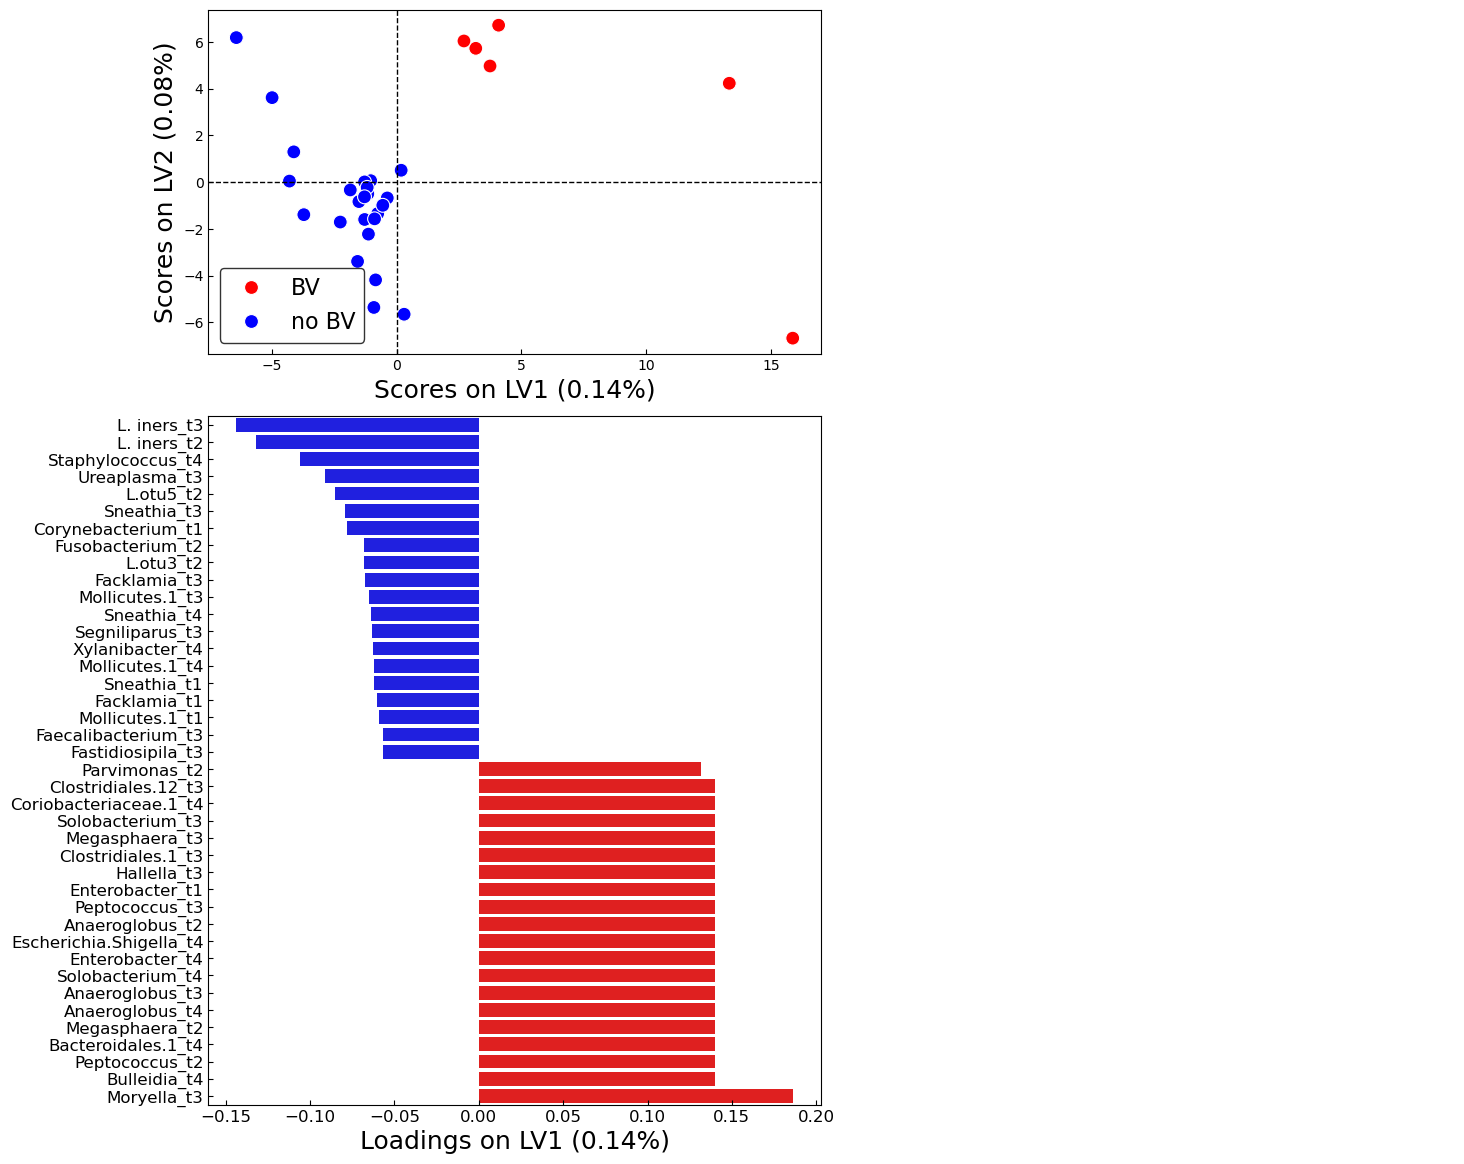

In [5]:
PLSDA_plots(df_3, y_3, num_components=2, orthogonalize=False, num_loadings=20, LV1=True, LV2=False)

# CST-IV gajer used common features with HMP

In [6]:
# HMP data
import warnings
# Suppress all warnings globally
warnings.filterwarnings("ignore")
from QE_functions import *
df_hmp = df_abundance_nugent(filename=None, log=True, rel_abund=False, zscore=False,cst=True, metabolomics=False)
# Gajer data
df_gajer = Gajer_preprocessing_data(log=True, rel_abund=False, zscore=False)
#filtering: select common hmp and gajer features 
df_hmp_filtered, df_gajer_filtered = common_feature_selection_in_2_dataframes(df_hmp,df_gajer,rename_dict=None)
df_gajer_filtered['CST_HL'] = df_gajer['CST_HL']
# Gajer Cohort
X, y = menstruation_xblock_y_premensesX(df_gajer_filtered,menses_included=False,four_labels=False, multistability=False) #X=premenses data

X, y = drop_blocks(X,y,thres=4)
(X_1, y_1), (X_2, y_2), (X_3, y_3), (X_4, y_4), (X_5, y_5) = split_blocks_by_CST_most_frequent(X, y, equal_selection=False)




df_4 = flatten(X_4)
#PLSDA_plots(df_4, y_4, num_components=2, orthogonalize=True, num_loadings=10, LV1=True, LV2=False)
#random_forest_model(df_test,y_test)
#RForest_top_features_plot(df_test,y_test,numb_features=35)
#plsda_scores_loading(df_test,y_test,numb_loadings=25, orthogonalize=True)
#all_model_evaluation(df_test,y_test,test=True,n_splits=3)

log transformed data
log transformed data
Number of x_blocks (X): 116
Shape of labels (y): (116,)
Filtered number of x_blocks: 76
Filtered shape of labels (y): (76,)
Number of 1s: 30
Number of 0s: 46
length of X_1 and y_1:  15 15
length of X_2 and y_2:  2 2
length of X_3 and y_3:  30 30
length of X_4 and y_4:  28 28
length of X_5 and y_5:  0 0


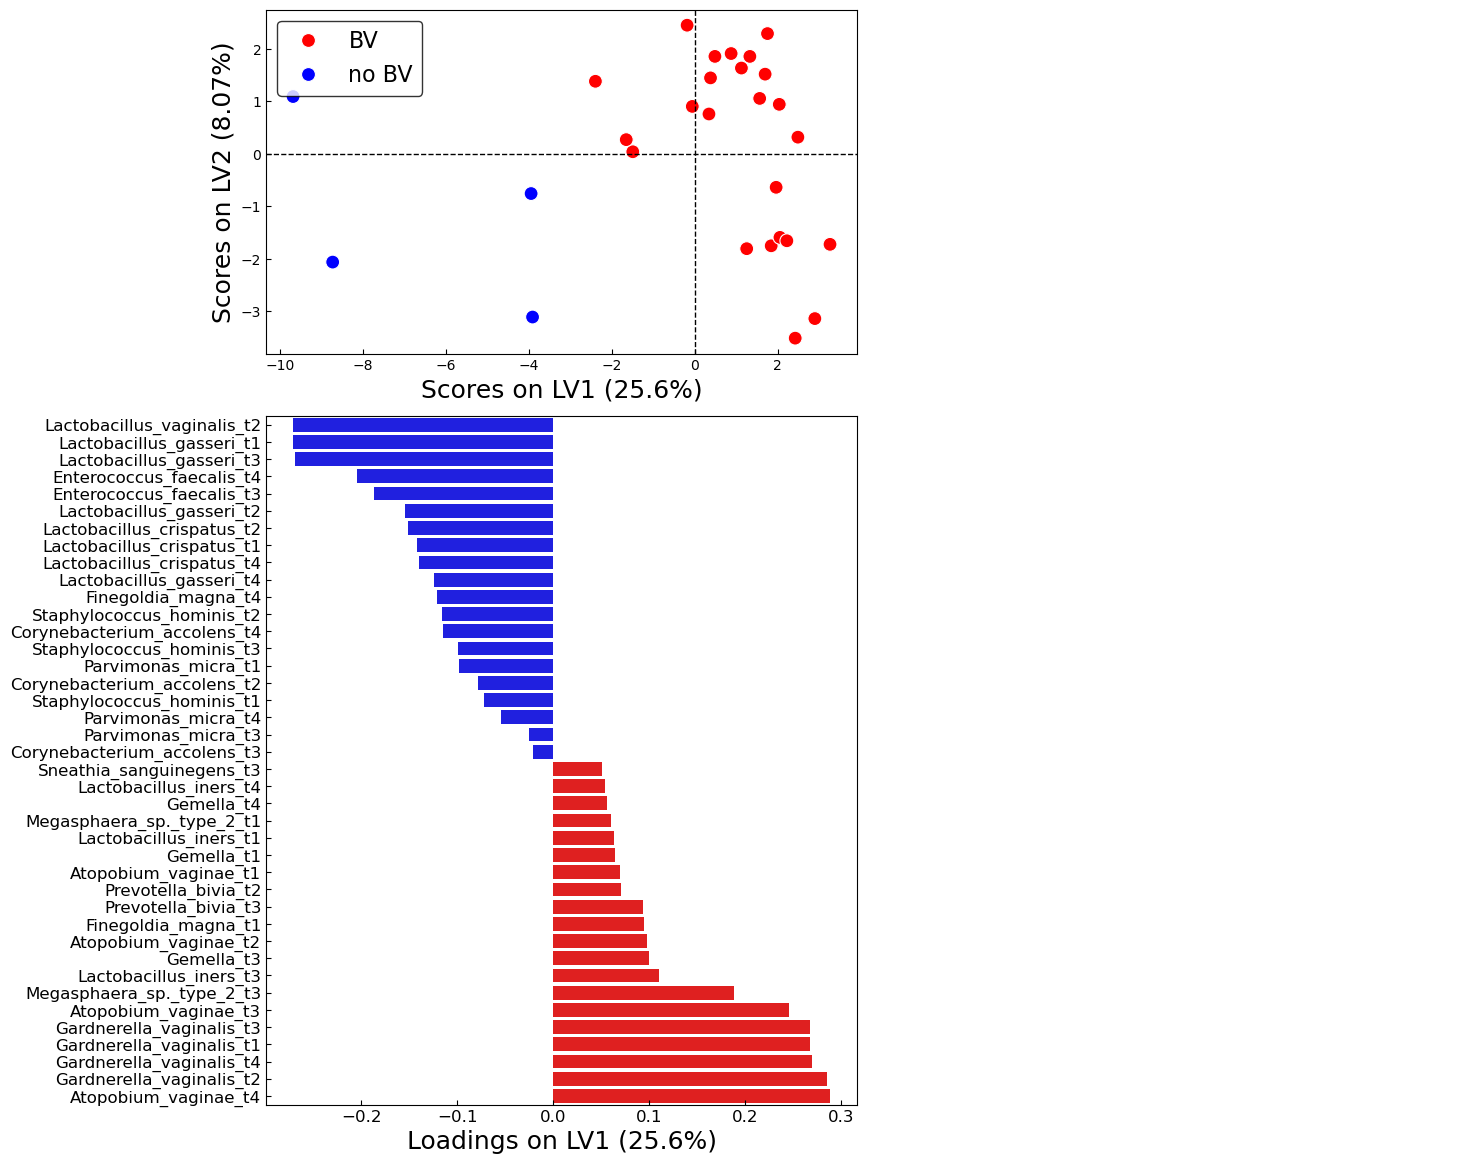

In [8]:
PLSDA_plots(df_4, y_4, num_components=2, orthogonalize=True, num_loadings=20, LV1=True, LV2=False)

In [10]:
# HMP data
import warnings
# Suppress all warnings globally
warnings.filterwarnings("ignore")
from QE_functions import *
df_hmp = df_abundance_nugent(filename=None, log=True, rel_abund=False, zscore=False,cst=True, metabolomics=False)
# Gajer data
#df_gajer = Gajer_preprocessing_data(log=True, rel_abund=False, zscore=False)
#filtering: select common hmp and gajer features 
df_hmp_filtered, df_gajer_filtered = common_feature_selection_in_2_dataframes(df_hmp,df_gajer,rename_dict=None)
df_hmp_filtered['CST_HL'] = df_hmp['CST_HL']
# Gajer Cohort
X, y = menstruation_xblock_y_premensesX(df_hmp_filtered,menses_included=False,four_labels=False, multistability=False) #X=premenses data

X, y = drop_blocks(X,y,thres=4)
(X_1, y_1), (X_2, y_2), (X_3, y_3), (X_4, y_4), (X_5, y_5) = split_blocks_by_CST_most_frequent(X, y, equal_selection=False)




df_4 = flatten(X_4)
#PLSDA_plots(df_4, y_4, num_components=2, orthogonalize=True, num_loadings=10, LV1=True, LV2=False)
#random_forest_model(df_test,y_test)
#RForest_top_features_plot(df_test,y_test,numb_features=35)
#plsda_scores_loading(df_test,y_test,numb_loadings=25, orthogonalize=True)
#all_model_evaluation(df_test,y_test,test=True,n_splits=3)

log transformed data
Number of x_blocks (X): 205
Shape of labels (y): (205,)
Filtered number of x_blocks: 146
Filtered shape of labels (y): (146,)
Number of 1s: 59
Number of 0s: 87
length of X_1 and y_1:  29 29
length of X_2 and y_2:  20 20
length of X_3 and y_3:  41 41
length of X_4 and y_4:  43 43
length of X_5 and y_5:  4 4


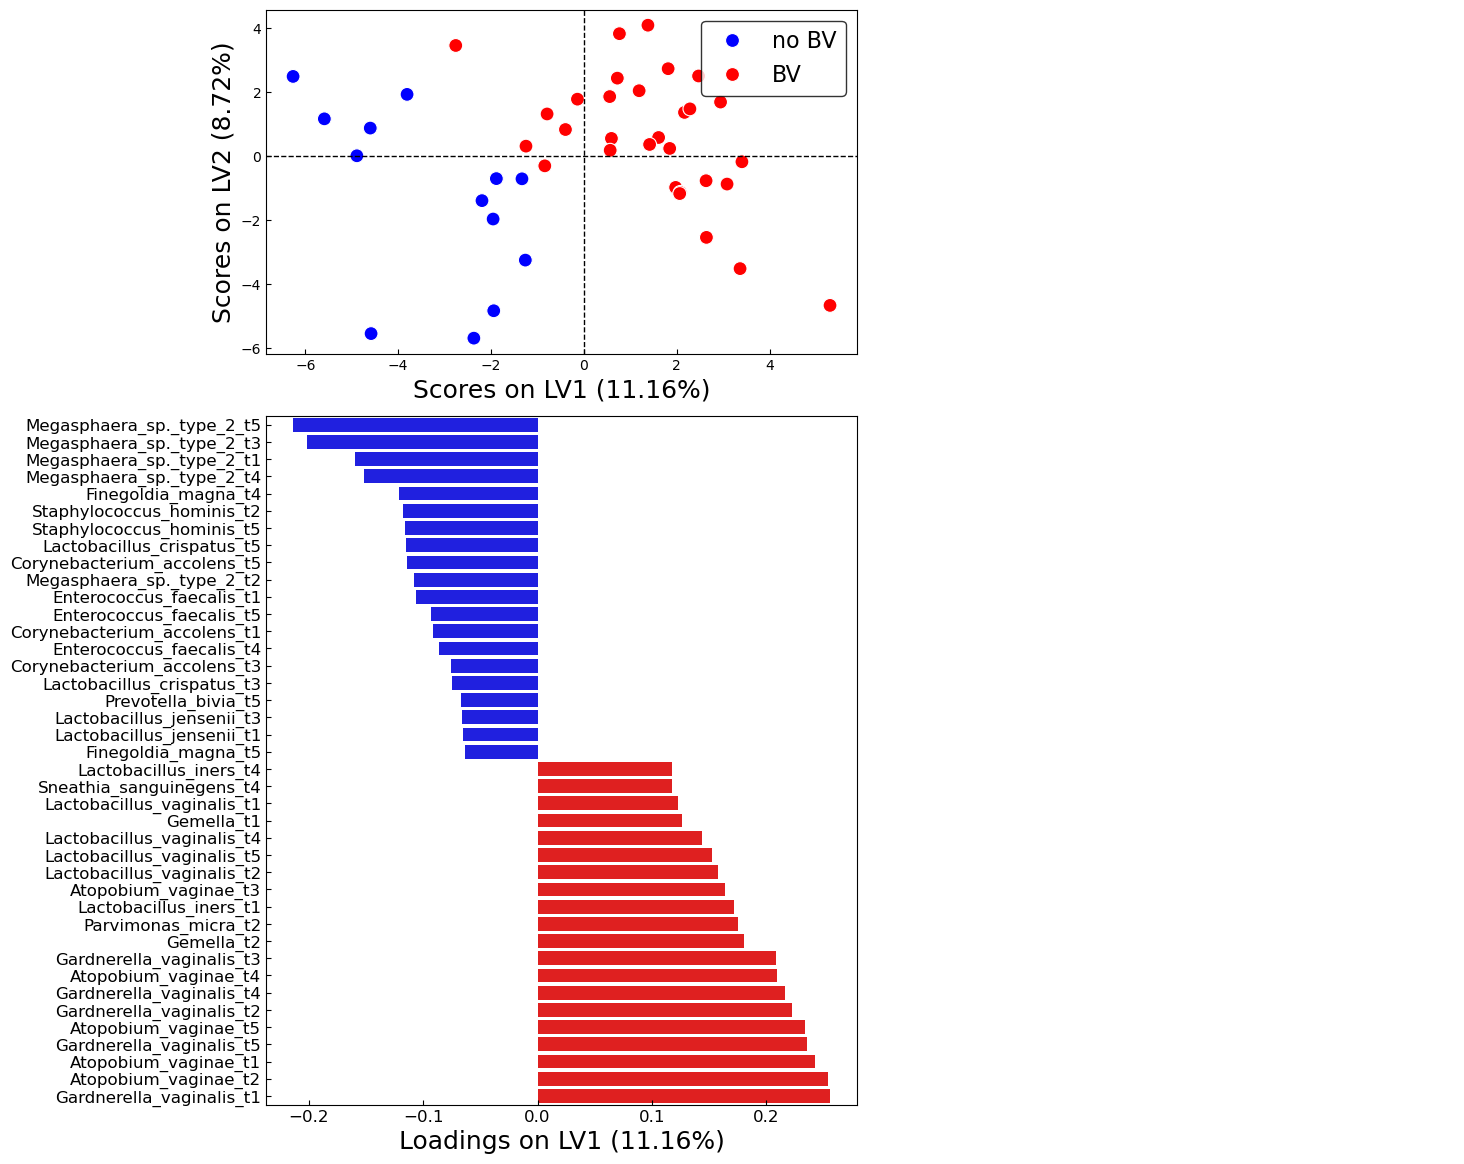

In [13]:
PLSDA_plots(df_4, y_4, num_components=2, orthogonalize=True, num_loadings=20, LV1=True, LV2=False)

In [14]:
# HMP data
import warnings
# Suppress all warnings globally
warnings.filterwarnings("ignore")
# Gajer data
df_gajer = Gajer_preprocessing_data(log=True, rel_abund=False, zscore=False)
# Gajer Cohort
X, y = menstruation_xblock_y_premensesX(df_gajer,menses_included=False,four_labels=False, multistability=False) #X=premenses data

X, y = drop_blocks(X,y,thres=4)
(X_1, y_1), (X_2, y_2), (X_3, y_3), (X_4, y_4), (X_5, y_5) = split_blocks_by_CST_most_frequent(X, y, equal_selection=False)



log transformed data
Number of x_blocks (X): 116
Shape of labels (y): (116,)
Filtered number of x_blocks: 76
Filtered shape of labels (y): (76,)
Number of 1s: 30
Number of 0s: 46
length of X_1 and y_1:  15 15
length of X_2 and y_2:  2 2
length of X_3 and y_3:  30 30
length of X_4 and y_4:  28 28
length of X_5 and y_5:  0 0


In [24]:
sum(y_5==1)

0